<a href="https://www.kaggle.com/code/subhamds69/student-69?scriptVersionId=241822970" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/kaggle/input/student/Dataset.csv')
df.head()

/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.11/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.11/dist-packages/pan

school sex address famsize Pstatus  Medu  Fedu     Mjob      Fjob  reason  \
0     GP   F       U     GT3       A     4   4.0  at_home   teacher  course   
1     GP   F       U     GT3       T     1   1.0  at_home     other  course   
2     GP   F       U     LE3       T     1   1.0  at_home     other   other   
3     GP   F       U     GT3       T     4   2.0   health  services    home   
4     GP   F       U     GT3       T     3   3.0    other     other    home   

   ... Dalc  health  absences  G1    G2  G3 Feature_1 Feature_2 Feature_3  \
0  ...    1       3       4.0   0  11.0  11      18.0       2.0       1.0   
1  ...    1       3       2.0   9  11.0  11      17.0       2.0       1.0   
2  ...    2       3       6.0  12  13.0  12      15.0       NaN       3.0   
3  ...    1       5       0.0  14  14.0  14      15.0       3.0       1.0   
4  ...    1       5       0.0  11  13.0  13      16.0       NaN       2.0   

  romantic  
0       no  
1       no  
2       no  
3      yes  
4       no  

[5 rows x 33 columns]

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     599 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        576 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  576 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      573 non-null    object 
 19  internet    649 non-null    o

In [56]:
df.describe()

Medu        Fedu  traveltime    failures      famrel    freetime  \
count  649.000000  576.000000  576.000000  649.000000  649.000000  604.000000   
mean     2.514638    2.303819    1.574653    0.221880    3.930663    3.172185   
std      1.134552    1.111076    0.744592    0.593235    0.955717    1.044684   
min      0.000000    0.000000    1.000000    0.000000    1.000000    1.000000   
25%      2.000000    1.000000    1.000000    0.000000    4.000000    3.000000   
50%      2.000000    2.000000    1.000000    0.000000    4.000000    3.000000   
75%      4.000000    3.000000    2.000000    0.000000    5.000000    4.000000   
max      4.000000    4.000000    4.000000    3.000000    5.000000    5.000000   

            goout        Dalc      health    absences          G1          G2  \
count  649.000000  649.000000  649.000000  580.000000  649.000000  614.000000   
mean     3.184900    1.502311    3.536210    3.746552   11.399076   11.586319   
std      1.175766    0.924834    1.446259    4.732890    2.745265    2.927878   
min      1.000000    1.000000    1.000000    0.000000    0.000000    0.000000   
25%      2.000000    1.000000    2.000000    0.000000   10.000000   10.000000   
50%      3.000000    1.000000    4.000000    2.000000   11.000000   11.000000   
75%      4.000000    2.000000    5.000000    6.000000   13.000000   13.000000   
max      5.000000    5.000000    5.000000   32.000000   19.000000   19.000000   

               G3   Feature_1   Feature_2   Feature_3  
count  649.000000  611.000000  603.000000  610.000000  
mean    11.906009   16.747954    1.913765    2.262295  
std      3.230656    1.216812    0.830798    1.285279  
min      0.000000   15.000000    1.000000    1.000000  
25%     10.000000   16.000000    1.000000    1.000000  
50%     12.000000   17.000000    2.000000    2.000000  
75%     14.000000   18.000000    2.000000    3.000000  
max     19.000000   22.000000    4.000000    5.000000

In [57]:
df.isnull().sum()

school         0
sex            0
address        0
famsize       50
Pstatus        0
Medu           0
Fedu          73
Mjob           0
Fjob           0
reason         0
guardian       0
traveltime    73
failures       0
schoolsup      0
famsup         0
paid           0
activities     0
nursery        0
higher        76
internet       0
famrel         0
freetime      45
goout          0
Dalc           0
health         0
absences      69
G1             0
G2            35
G3             0
Feature_1     38
Feature_2     46
Feature_3     39
romantic       0
dtype: int64

To fill the null values in the **famsize and higher** columns, we use the majority value (i.e., the one that appears more frequently). Since there are only two possible values, we fill missing entries with the more common one..


In [59]:
df['famsize'] = df['famsize'].fillna('GT3')


In [60]:
df['higher'] = df['higher'].fillna('yes')



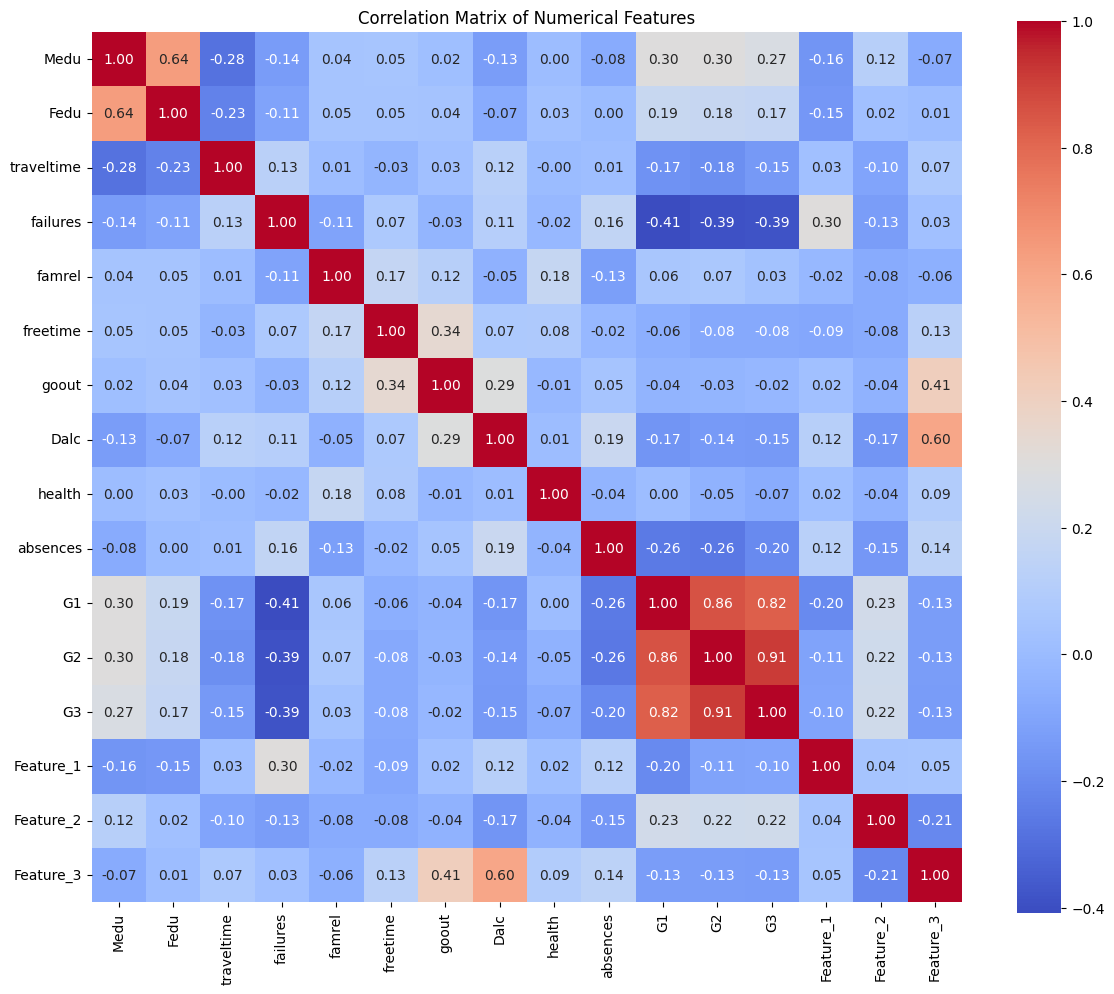

In [61]:



# Step 1: Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Drop rows with missing values (for correlation analysis)
numeric_df_clean = numeric_df.dropna()

# Step 3: Compute correlation matrix
corr_matrix = numeric_df_clean.corr()

# Step 4: Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


From the correlation matrix, we can see a strong relationship between **father's education and mother's education**. Therefore, we replace the null values in 'fedu' with the corresponding values from 'medu'.

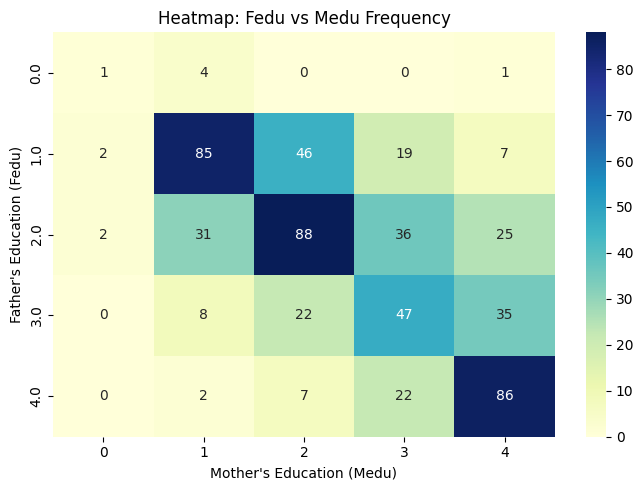

In [62]:
# Create a crosstab for frequency heatmap
crosstab = pd.crosstab(df['Fedu'], df['Medu'])

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel("Mother's Education (Medu)")
plt.ylabel("Father's Education (Fedu)")
plt.title("Heatmap: Fedu vs Medu Frequency")
plt.tight_layout()
plt.show()


In [63]:
# Fill missing Fedu with Medu value (if you trust the correlation)
df['Fedu'] = df['Fedu'].fillna(df['Medu'])


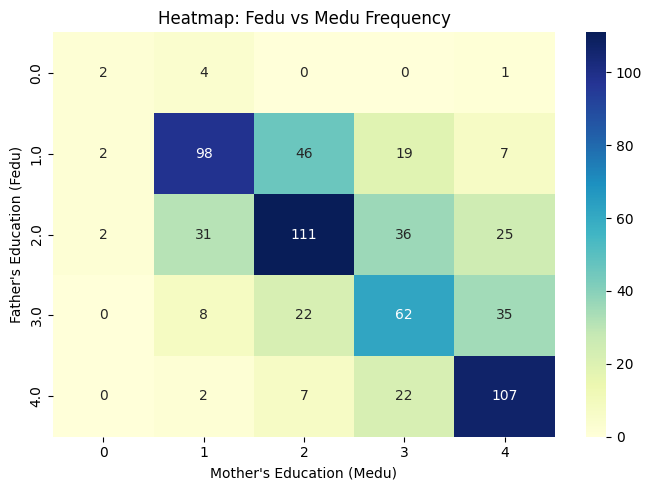

In [64]:
# Create a crosstab for frequency heatmap
crosstab = pd.crosstab(df['Fedu'], df['Medu'])

# Plot heatmap
plt.figure(figsize=(7, 5))
sns.heatmap(crosstab, annot=True, cmap='YlGnBu', fmt='d')
plt.xlabel("Mother's Education (Medu)")
plt.ylabel("Father's Education (Fedu)")
plt.title("Heatmap: Fedu vs Medu Frequency")
plt.tight_layout()
plt.show()

We can fill the null values in **freetime, G2, Feature_1, and Feature_2** using the median, as their mean, median, and mode values are close, and there is no significant correlation with other data.

In [65]:
mean_freetime = df['freetime'].mean()
median_freetime = df['freetime'].median()
mode_freetime = df['freetime'].mode().iloc[0]  # Take the first mode if there are multiple

print(f"Mean: {mean_freetime}")
print(f"Median: {median_freetime}")
print(f"Mode: {mode_freetime}")



Mean: 3.172185430463576
Median: 3.0
Mode: 3.0


In [66]:
df['freetime'] = df['freetime'].fillna(df['freetime'].median())  


In [67]:
mean_g2 = df['G2'].mean()
median_g2 = df['G2'].median()
mode_g2 = df['G2'].mode().iloc[0]  # Get the first mode if multiple exist

print(f"Mean of G2: {mean_g2}")
print(f"Median of G2: {median_g2}")
print(f"Mode of G2: {mode_g2}")




Mean of G2: 11.586319218241043
Median of G2: 11.0
Mode of G2: 11.0


In [70]:
df['G2'] = df['G2'].fillna(df['G2'].median())


In [71]:
mean_f1 = df['Feature_1'].mean()
median_f1 = df['Feature_1'].median()
mode_f1 = df['Feature_1'].mode().iloc[0]  # first mode if multiple

print(f"Mean of Feature_1: {mean_f1}")
print(f"Median of Feature_1: {median_f1}")
print(f"Mode of Feature_1: {mode_f1}")



Mean of Feature_1: 16.74795417348609
Median of Feature_1: 17.0
Mode of Feature_1: 17.0


In [74]:
df['Feature_1'] = df['Feature_1'].fillna(df['Feature_1'].median())

In [75]:
# Feature_2 stats
mean_f2 = df['Feature_2'].mean()
median_f2 = df['Feature_2'].median()
mode_f2 = df['Feature_2'].mode().iloc[0]

print(f"Feature_2 → Mean: {mean_f2}, Median: {median_f2}, Mode: {mode_f2}")


Feature_2 → Mean: 1.913764510779436, Median: 2.0, Mode: 2.0


In [76]:
df['Feature_2'] = df['Feature_2'].fillna(df['Feature_2'].median())



We can relate travel time to address, as rural students are expected to take more time to travel than urban students. We analyze this by calculating the mean, median, and mode of travel time separately for rural and urban areas.

In [77]:


# Grouped mean
mean_tt = df.groupby('address')['traveltime'].mean()

# Grouped median
median_tt = df.groupby('address')['traveltime'].median()

# Grouped mode (may have multiple modes, so take the first one)
mode_tt = df.groupby('address')['traveltime'].agg(lambda x: x.mode().iloc[0])

# Combine all into one DataFrame for easy viewing
travel_stats = pd.DataFrame({
    'Mean': mean_tt,
    'Median': median_tt,
    'Mode': mode_tt
})

print(travel_stats)




             Mean  Median  Mode
address                        
R        1.971591     2.0   2.0
U        1.400000     1.0   1.0


As we can see, the median travel time in rural areas is 2, while in urban areas it is 1. Therefore, we fill the missing values accordingly based on the address.

In [78]:
df.loc[(df['address'] == 'R') & (df['traveltime'].isna()), 'traveltime'] = 2
df.loc[(df['address'] == 'U') & (df['traveltime'].isna()), 'traveltime'] = 1


We will now find the mean, median, and mode of absences.

In [79]:
mean_abs = df['absences'].mean()
median_abs = df['absences'].median()
mode_abs = df['absences'].mode().iloc[0]  # First mode if multiple exist

print(f"Mean: {mean_abs}")
print(f"Median: {median_abs}")
print(f"Mode: {mode_abs}")



Mean: 3.746551724137931
Median: 2.0
Mode: 0.0


There is a difference between the mean, median, and mode of absences, with the mode being zero. Therefore, we will explore other methods to fill the null values in the 'absences' column.

There may be a relationship between 'goout' time and absences, as students with more absences tend to spend more time going out.

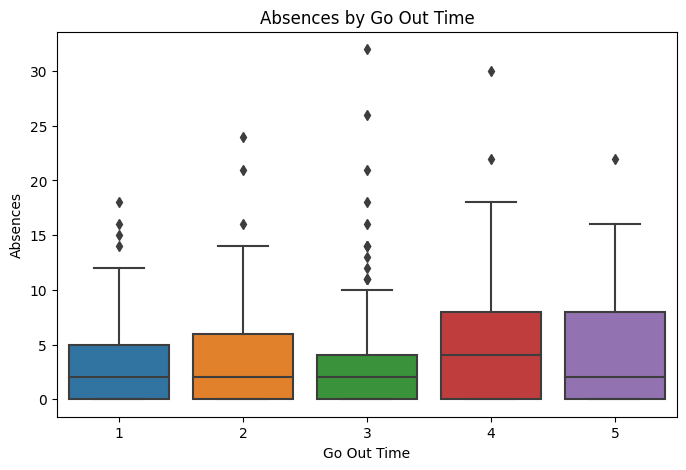

In [81]:
plt.figure(figsize=(8,5))
sns.boxplot(x='goout', y='absences', data=df)
plt.title('Absences by Go Out Time')
plt.xlabel('Go Out Time')
plt.ylabel('Absences')
plt.show()


We can see that the median number of absences increases as the 'goout' level increases, so we fill the missing values accordingly.

In [82]:
# Fill null values in 'absences' based on the median of each 'goout' group
df['absences'] = df['absences'].fillna(df.groupby('goout')['absences'].transform('median'))




In [83]:
# Feature_3 stats
mean_f3 = df['Feature_3'].mean()
median_f3 = df['Feature_3'].median()
mode_f3 = df['Feature_3'].mode().iloc[0]

print(f"Feature_3 → Mean: {mean_f3}, Median: {median_f3}, Mode: {mode_f3}")

Feature_3 → Mean: 2.262295081967213, Median: 2.0, Mode: 1.0


There is a difference between the mean, median, and mode of Feature_3. Therefore, we will explore other methods to fill the null values in the 'Feature_3' column.

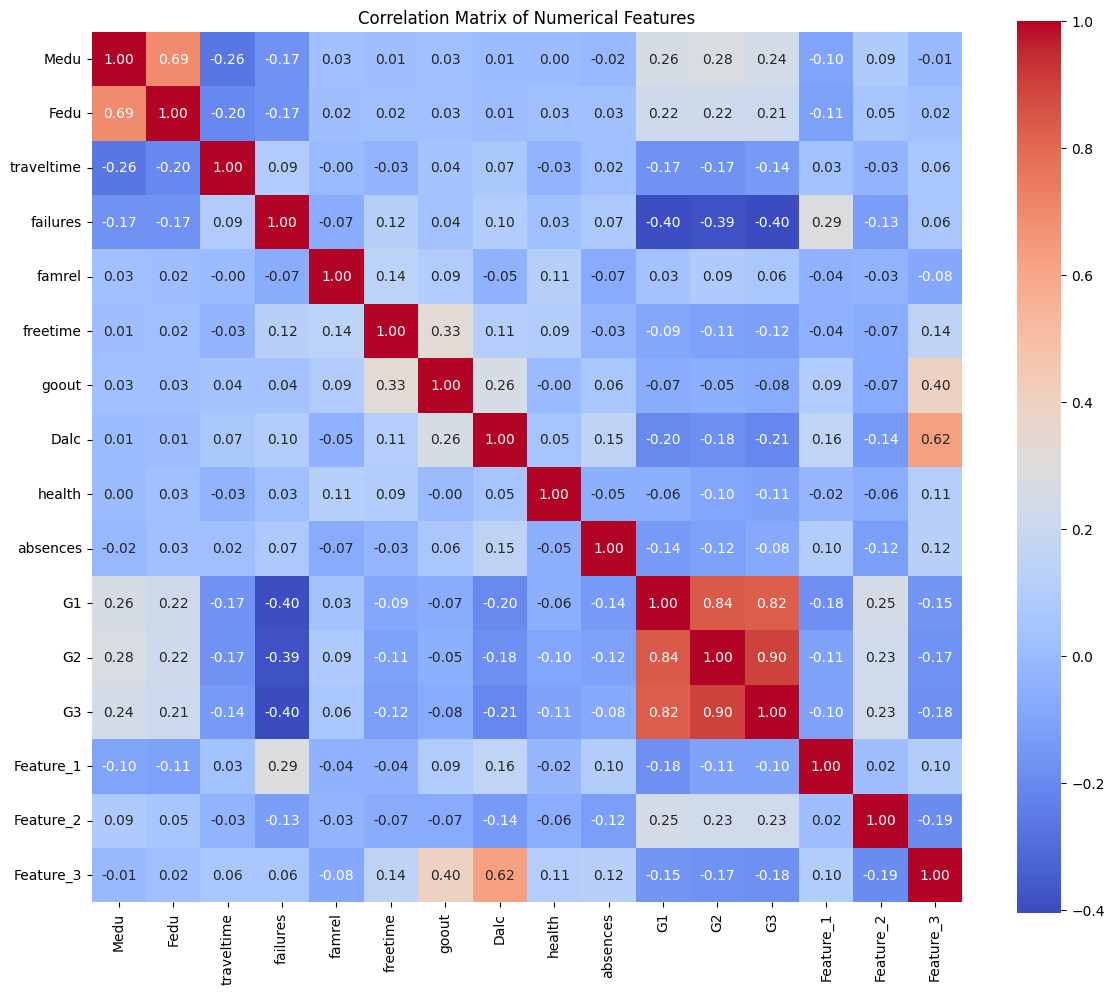

In [84]:
# Step 1: Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Drop rows with missing values (for correlation analysis)
numeric_df_clean = numeric_df.dropna()

# Step 3: Compute correlation matrix
corr_matrix = numeric_df_clean.corr()

# Step 4: Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


We can see that there is a strong correlation between 'Dalc', 'goout', and 'Feature_3'. Therefore, we analyze the data accordingly.

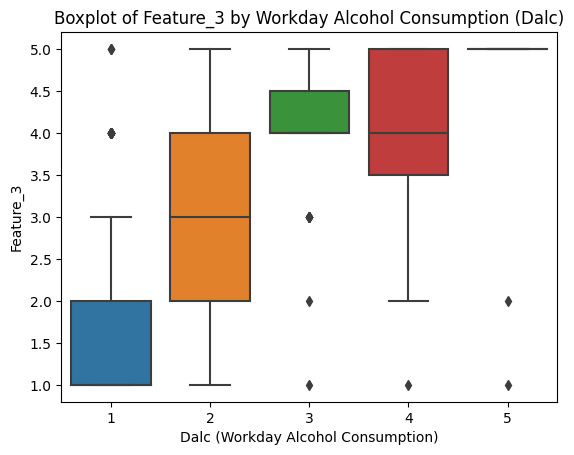

In [85]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the boxplot
sns.boxplot(x='Dalc', y='Feature_3', data=df)

# Add title and labels
plt.title('Boxplot of Feature_3 by Workday Alcohol Consumption (Dalc)')
plt.xlabel('Dalc (Workday Alcohol Consumption)')
plt.ylabel('Feature_3')

# Show the plot
plt.show()


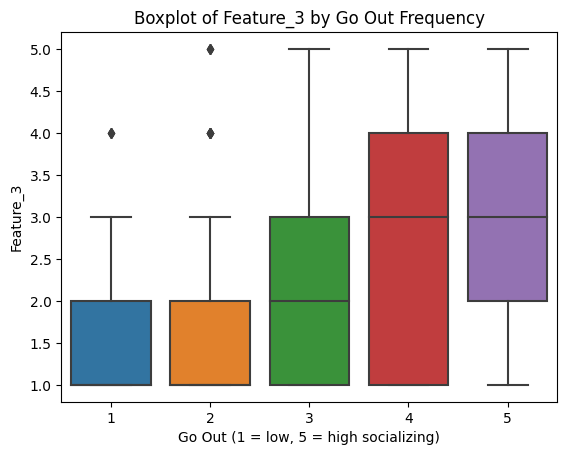

In [86]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot
sns.boxplot(x='goout', y='Feature_3', data=df)

# Labels and title
plt.title('Boxplot of Feature_3 by Go Out Frequency')
plt.xlabel('Go Out (1 = low, 5 = high socializing)')
plt.ylabel('Feature_3')

# Show plot
plt.show()


In [87]:


# First create a median mapping from Dalc and GoOut combinations
median_feature3 = df.groupby(['Dalc', 'goout'])['Feature_3'].median()

# Function to fill missing Feature_3 using the median of corresponding Dalc and goout
def fill_feature3(row):
    if pd.isnull(row['Feature_3']):
        return median_feature3.get((row['Dalc'], row['goout']), df['Feature_3'].median())
    else:
        return row['Feature_3']

# Apply the function
df['Feature_3'] = df.apply(fill_feature3, axis=1)




In [88]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      649 non-null    object 
 1   sex         649 non-null    object 
 2   address     649 non-null    object 
 3   famsize     649 non-null    object 
 4   Pstatus     649 non-null    object 
 5   Medu        649 non-null    int64  
 6   Fedu        649 non-null    float64
 7   Mjob        649 non-null    object 
 8   Fjob        649 non-null    object 
 9   reason      649 non-null    object 
 10  guardian    649 non-null    object 
 11  traveltime  649 non-null    float64
 12  failures    649 non-null    int64  
 13  schoolsup   649 non-null    object 
 14  famsup      649 non-null    object 
 15  paid        649 non-null    object 
 16  activities  649 non-null    object 
 17  nursery     649 non-null    object 
 18  higher      649 non-null    object 
 19  internet    649 non-null    o

In [89]:
df.isnull().sum()

school        0
sex           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
goout         0
Dalc          0
health        0
absences      0
G1            0
G2            0
G3            0
Feature_1     0
Feature_2     0
Feature_3     0
romantic      0
dtype: int64

In [90]:
# Convert 'yes'/'no' to 1/0 only if needed
if df['romantic'].dtype == 'object' and df['romantic'].isin(['yes', 'no']).any():
    df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})

# Check conversion
print(df['romantic'].value_counts())


romantic
0    410
1    239
Name: count, dtype: int64


Change the 'romantic' values from 'yes' to 1 and 'no' to 0 so that we can analyze it more easily.

In [92]:
df.isnull().sum()

school        0
sex           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
famrel        0
freetime      0
goout         0
Dalc          0
health        0
absences      0
G1            0
G2            0
G3            0
Feature_1     0
Feature_2     0
Feature_3     0
romantic      0
dtype: int64

***Level:1***
Identification of Feature_1,Feature_2,Feature_3

Feature_1

In [96]:
df[['Feature_1']].describe()

Feature_1
count  649.000000
mean    16.762712
std      1.182079
min     15.000000
25%     16.000000
50%     17.000000
75%     18.000000
max     22.000000

"Feature_1 probably represents the age of the students. Since 75% of the students are less than or equal to 18 years old, the median is 17 years, and the average is 16.7 years—close to 17—this aligns with the typical age of high school students. We will further support our assumption by creating boxplots with 'Absences', 'Freetime', 'Health', and 'Traveltime'."

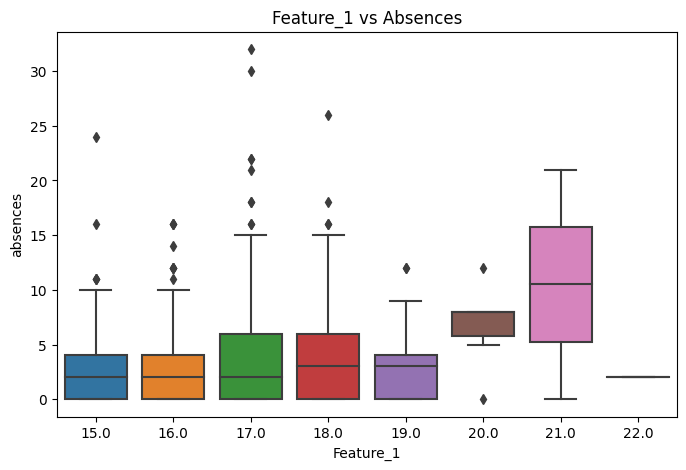

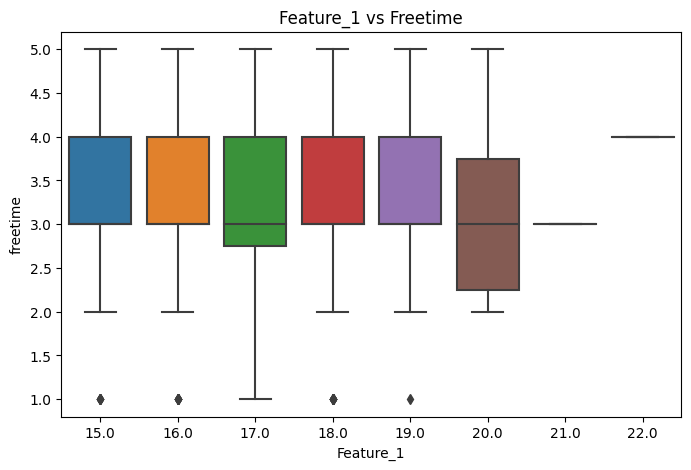

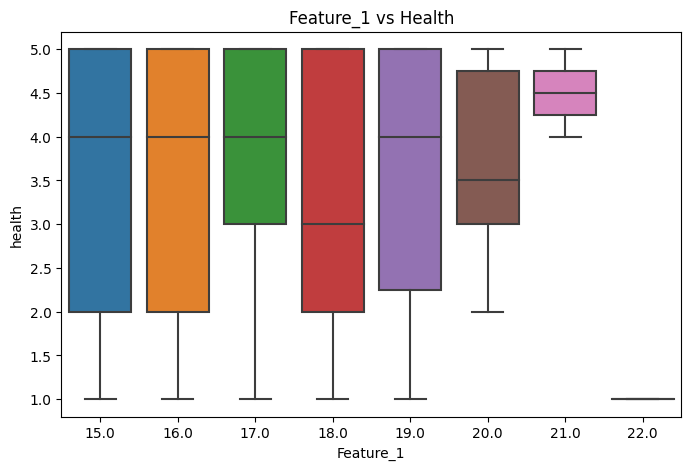

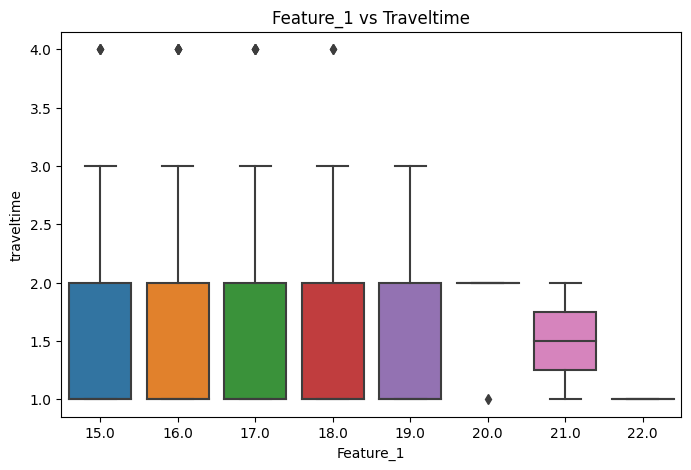

In [97]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.boxplot(x='Feature_1', y='absences', data=df)
plt.title('Feature_1 vs Absences')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Feature_1', y='freetime', data=df)
plt.title('Feature_1 vs Freetime')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Feature_1', y='health', data=df)
plt.title('Feature_1 vs Health')
plt.show()

plt.figure(figsize=(8, 5))
sns.boxplot(x='Feature_1', y='traveltime', data=df)
plt.title('Feature_1 vs Traveltime')
plt.show()


We cannot draw much conclusions from the traveltime, Health and Freetime graphs since the distribution is almost uniform till 19 and there are very less students of age 20,21,22 so nothing much can be concluded from a low number of datapoints.

For the absences graph we can see that majority of the students have relatively low absences till 19 years of age, whereas for higher ages like 20 and 21 years they have higher absences, probably due to more responsibilities for making income for their family. So this supports that the Feature_1 column is age of the students.

We can finally conclude that the Feature_1 column is age of the students

Feature_1="**Age**"

**Feature_2**

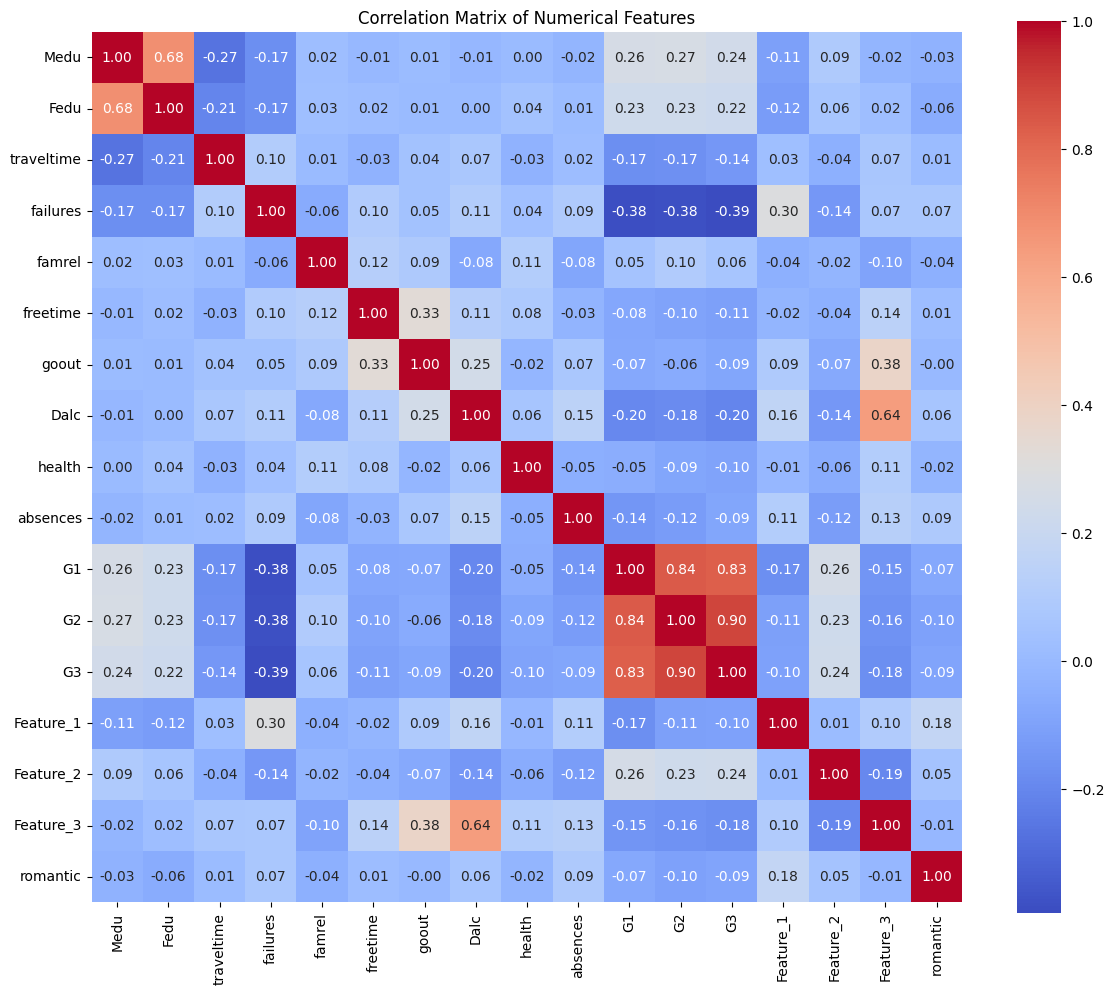

In [98]:
# Step 1: Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Drop rows with missing values (for correlation analysis)
numeric_df_clean = numeric_df.dropna()

# Step 3: Compute correlation matrix
corr_matrix = numeric_df_clean.corr()

# Step 4: Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()


We can see that there is some relationship between G1, G2, G3,failures and Feature_2.

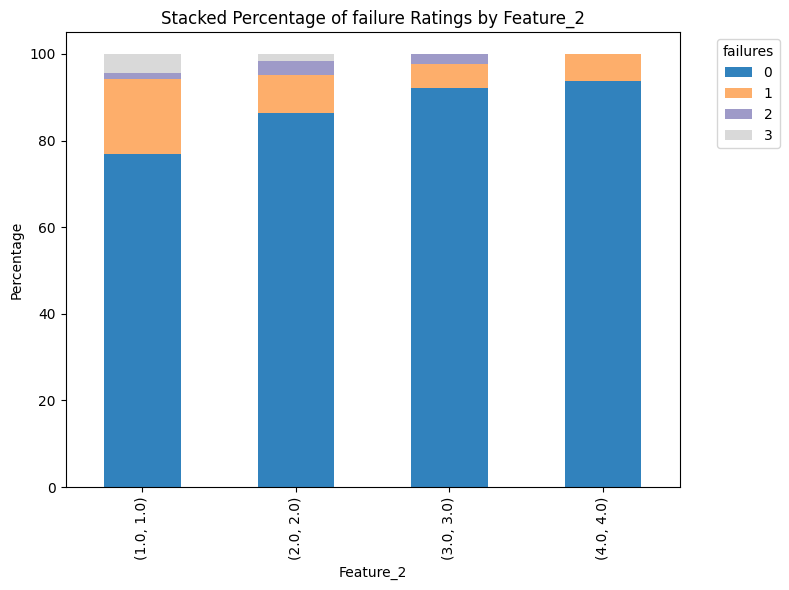

In [116]:
# Create the percentage DataFrame
percent_df = (
    df.groupby(['Feature_2', 'failures']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of failure Ratings by Feature_2')
plt.ylabel('Percentage')
plt.xlabel('Feature_2')
plt.legend(title='failures', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

This graph suggests that Feature_2 is inversely proportional to failures. As Feature_2 increases, the likelihood of a student failing decreases.

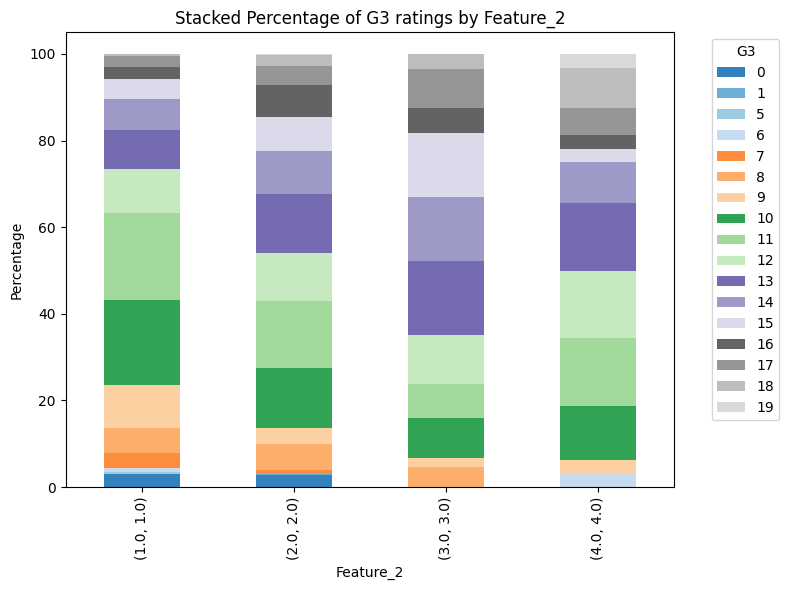

In [117]:
# Create the percentage DataFrame
percent_df = (
    df.groupby(['Feature_2', 'G3']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of G3 ratings by Feature_2')
plt.ylabel('Percentage')
plt.xlabel('Feature_2')
plt.legend(title='G3', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

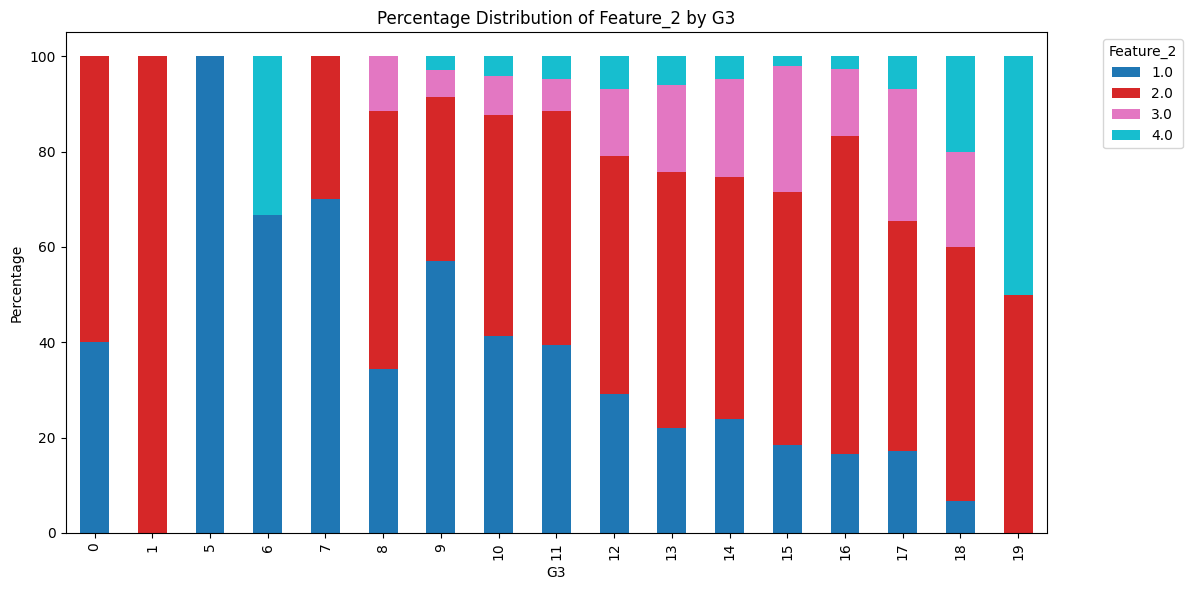

In [119]:
# Replace with your actual column names
group_col = 'G3'     # Column with values from 0 to 20
hue_col = 'Feature_2'          # Column with values 1, 2, 3, 4

# Step 1: Create a cross-tab of counts
count_data = pd.crosstab(df[group_col], df[hue_col])

# Step 2: Convert counts to percentages
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked percentage bar chart
percent_data.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab10')

# Step 4: Formatting
plt.ylabel('Percentage')
plt.title(f'Percentage Distribution of {hue_col} by {group_col}')
plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

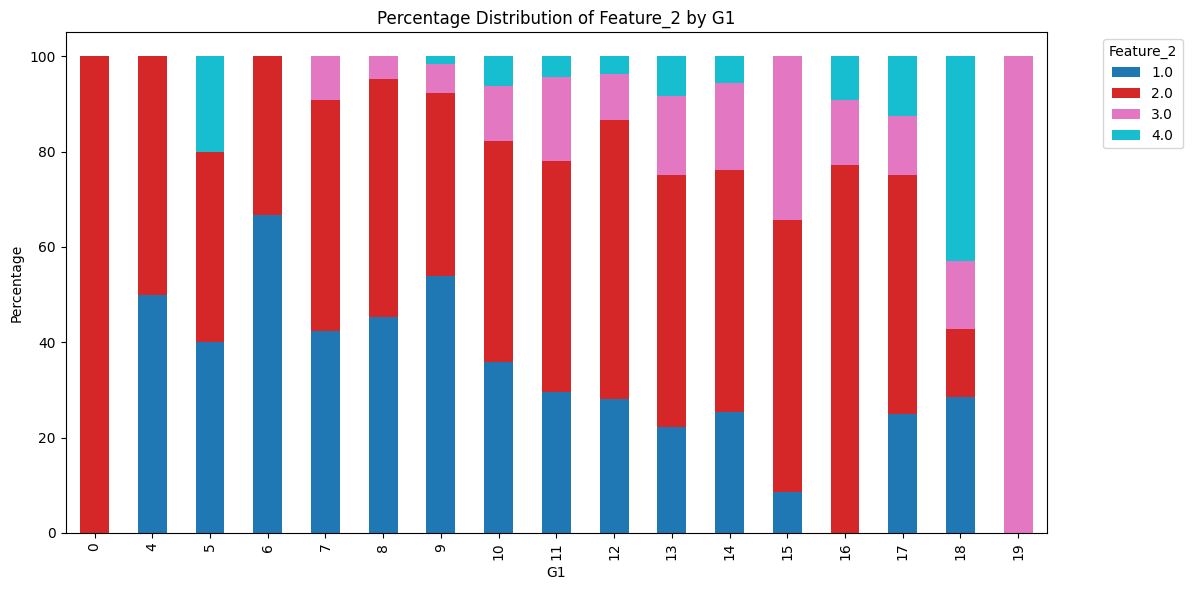

In [118]:
# Replace with your actual column names
group_col = 'G1'     # Column with values from 0 to 20
hue_col = 'Feature_2'          # Column with values 1, 2, 3, 4

# Step 1: Create a cross-tab of counts
count_data = pd.crosstab(df[group_col], df[hue_col])

# Step 2: Convert counts to percentages
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked percentage bar chart
percent_data.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab10')

# Step 4: Formatting
plt.ylabel('Percentage')
plt.title(f'Percentage Distribution of {hue_col} by {group_col}')
plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

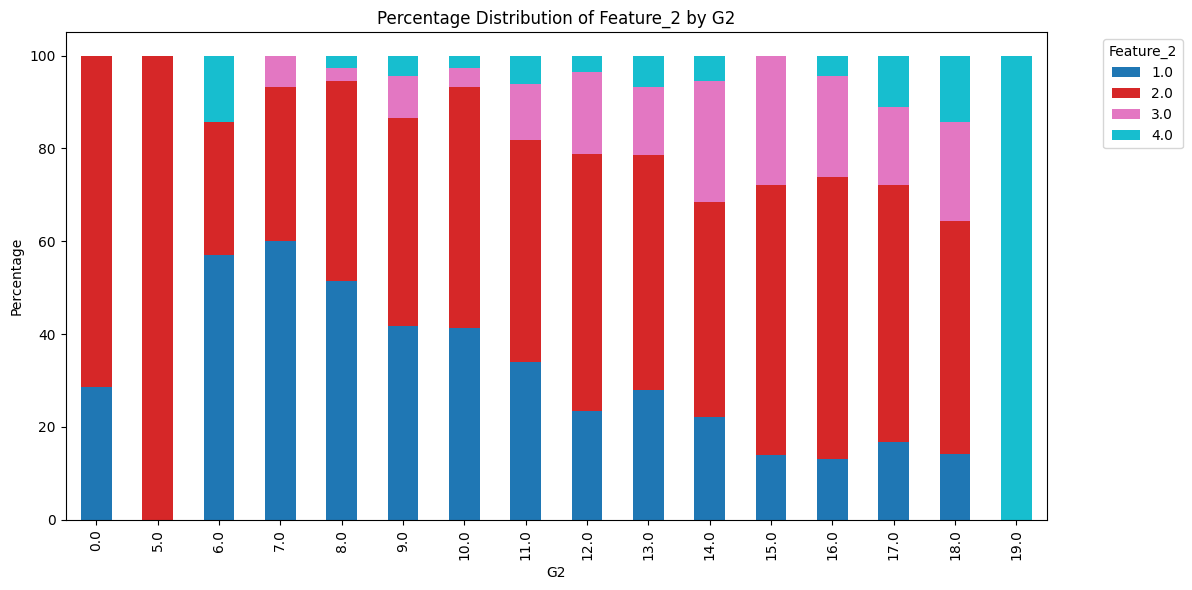

In [120]:
# Replace with your actual column names
group_col = 'G2'     # Column with values from 0 to 20
hue_col = 'Feature_2'          # Column with values 1, 2, 3, 4

# Step 1: Create a cross-tab of counts
count_data = pd.crosstab(df[group_col], df[hue_col])

# Step 2: Convert counts to percentages
percent_data = count_data.div(count_data.sum(axis=1), axis=0) * 100

# Step 3: Plot stacked percentage bar chart
percent_data.plot(kind='bar', stacked=True, figsize=(12,6), colormap='tab10')

# Step 4: Formatting
plt.ylabel('Percentage')
plt.title(f'Percentage Distribution of {hue_col} by {group_col}')
plt.legend(title=hue_col, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


We can finally conclude that Feature_2 is clearly related to academics, most likely representing either IQ or study hours. However, the distribution of students with respect to Feature_2 is skewed and does not follow a normal distribution. The values are concentrated around 1 and 2, with very few students in categories 3 and 4.

This pattern suggests that Feature_2 is unlikely to represent IQ, as IQ scores typically follow a normal distribution, with most individuals falling in the middle range (i.e., levels 2 and 3), and fewer in the extreme ranges (1 and 4).

Therefore, Feature_2 more likely represents a study hours rating, as most students tend to study less or moderately, and only a few study excessively.



**Feature_2= Study Hours**

Feature_3

In [122]:
df[['Feature_3']].describe()

Feature_3
count  649.000000
mean     2.267334
std      1.272857
min      1.000000
25%      1.000000
50%      2.000000
75%      3.000000
max      5.000000

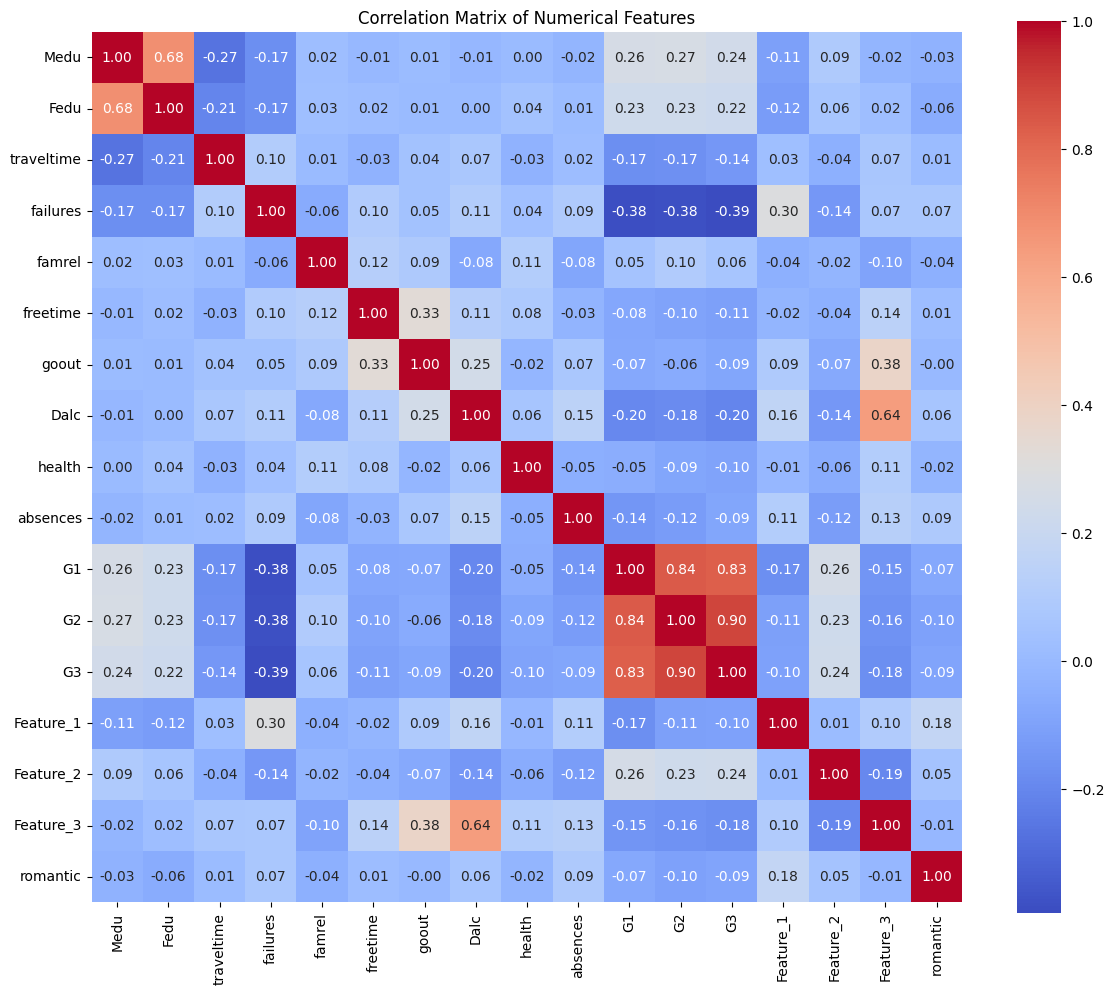

In [121]:
# Step 1: Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Step 2: Drop rows with missing values (for correlation analysis)
numeric_df_clean = numeric_df.dropna()

# Step 3: Compute correlation matrix
corr_matrix = numeric_df_clean.corr()

# Step 4: Plot correlation heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True)
plt.title("Correlation Matrix of Numerical Features")
plt.tight_layout()
plt.show()

"We can see that Feature_3 has a strong relationship with 'Dalc' and 'goout', and a slight relationship with 'Health', 'Feature_1', and 'Absences'."

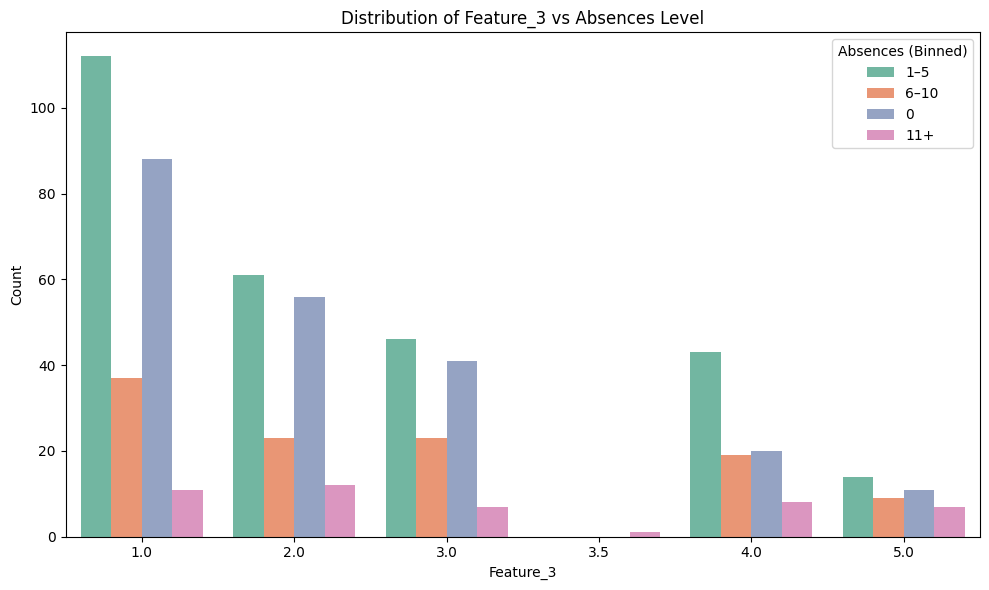

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create a binned version of 'absences' for clarity
def bin_absences(x):
    if x == 0:
        return '0'
    elif x <= 5:
        return '1–5'
    elif x <= 10:
        return '6–10'
    else:
        return '11+'

df['absences_bin'] = df['absences'].apply(bin_absences)

# Create a countplot
plt.figure(figsize=(10, 6))
sns.countplot(x='Feature_3', hue='absences_bin', data=df, palette='Set2')
plt.title('Distribution of Feature_3 vs Absences Level')
plt.xlabel('Feature_3')
plt.ylabel('Count')
plt.legend(title='Absences (Binned)')
plt.tight_layout()
plt.show()


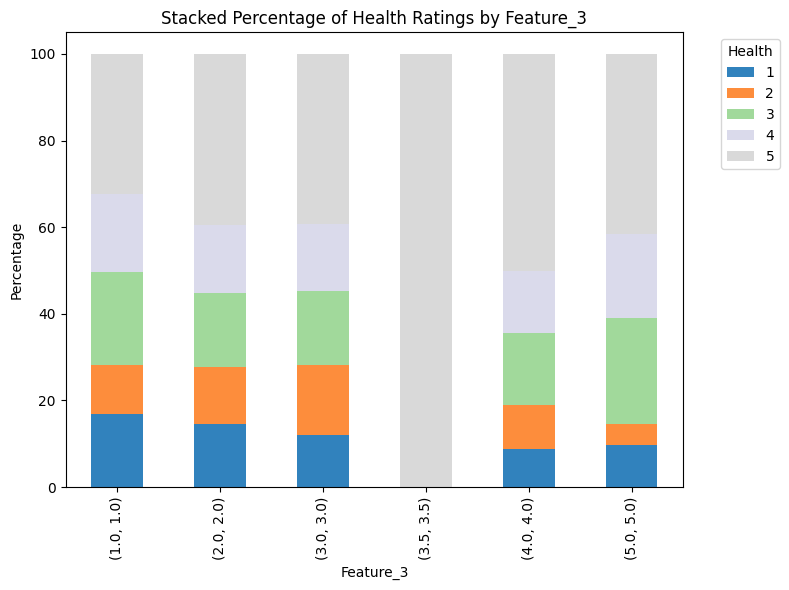

In [130]:
# Create the percentage DataFrame
percent_df = (
    df.groupby(['Feature_3', 'health']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of Health Ratings by Feature_3')
plt.ylabel('Percentage')
plt.xlabel('Feature_3')
plt.legend(title='Health', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


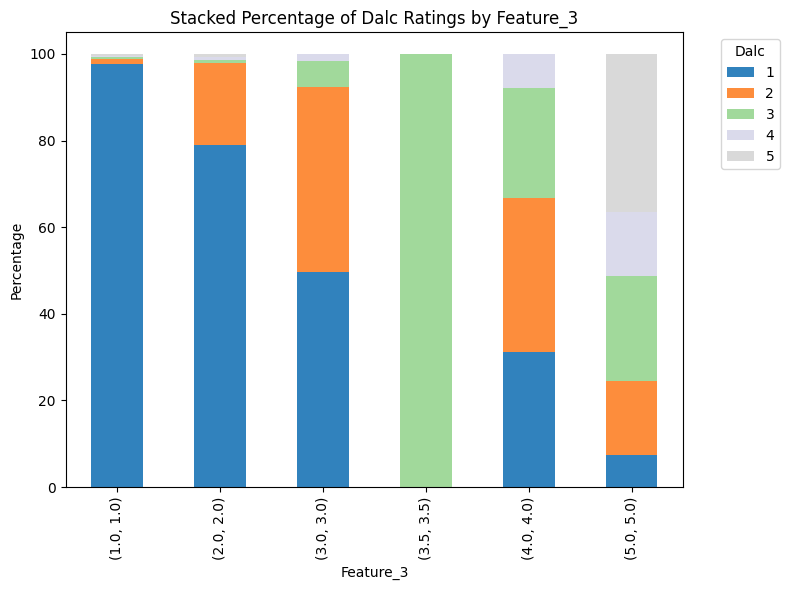

In [132]:
# Create the percentage DataFrame
percent_df = (
    df.groupby(['Feature_3', 'Dalc']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of Dalc Ratings by Feature_3')
plt.ylabel('Percentage')
plt.xlabel('Feature_3')
plt.legend(title='Dalc', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


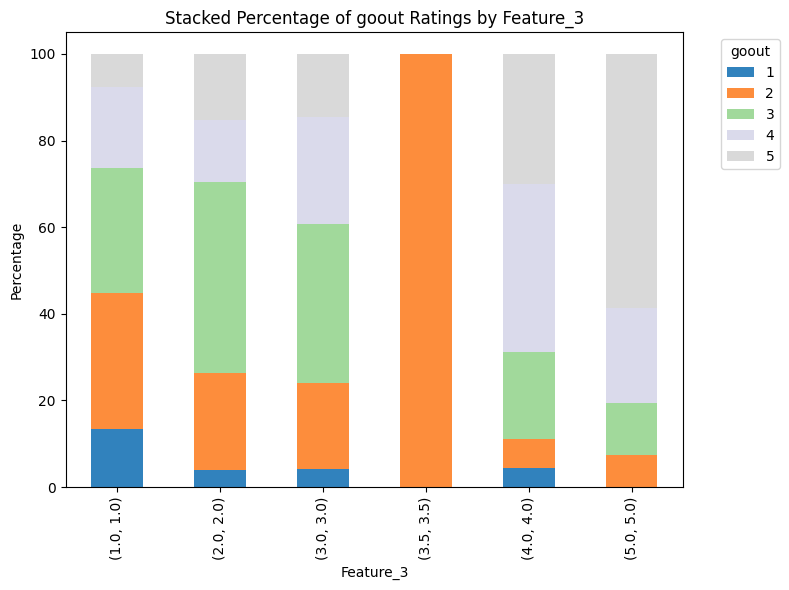

In [133]:
# Create the percentage DataFrame
percent_df = (
    df.groupby(['Feature_3', 'goout']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of goout Ratings by Feature_3')
plt.ylabel('Percentage')
plt.xlabel('Feature_3')
plt.legend(title='goout', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

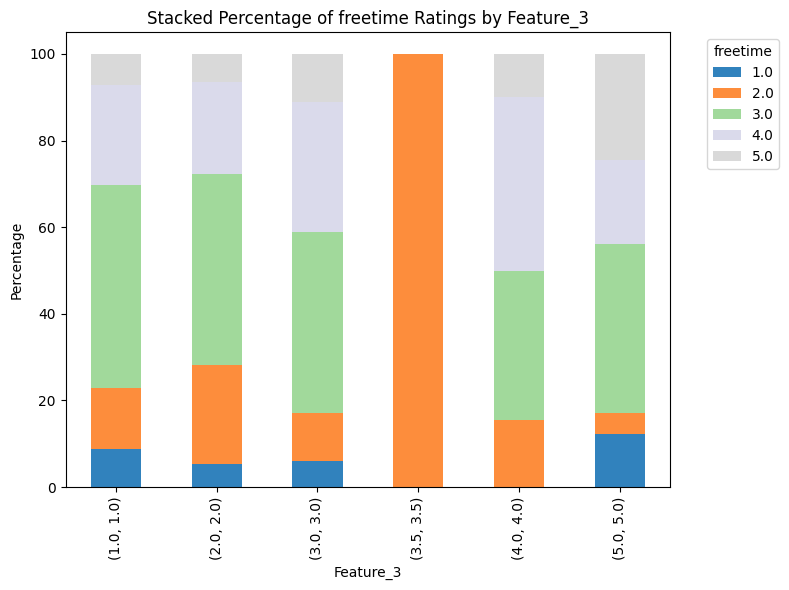

In [134]:
# Create the percentage DataFrame
percent_df = (
    df.groupby(['Feature_3', 'freetime']).size()
    .groupby(level=0).apply(lambda x: 100 * x / x.sum())
    .unstack(fill_value=0)  # convert to wide format
)

# Plot as stacked bar chart
percent_df.plot(kind='bar', stacked=True, figsize=(8, 6), colormap='tab20c')

plt.title('Stacked Percentage of freetime Ratings by Feature_3')
plt.ylabel('Percentage')
plt.xlabel('Feature_3')
plt.legend(title='freetime', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

We can clearly see that from the above data that feature_3 is releted to Dalc and goout so Feature-3 can be Social life (More active or extrovert person)

**Feature_3=Social life**

**LEVEL 3 FIVE INSIGHTFULL QUESTIONS**

**Q1] How Does Parents Education Affect Students Education?**

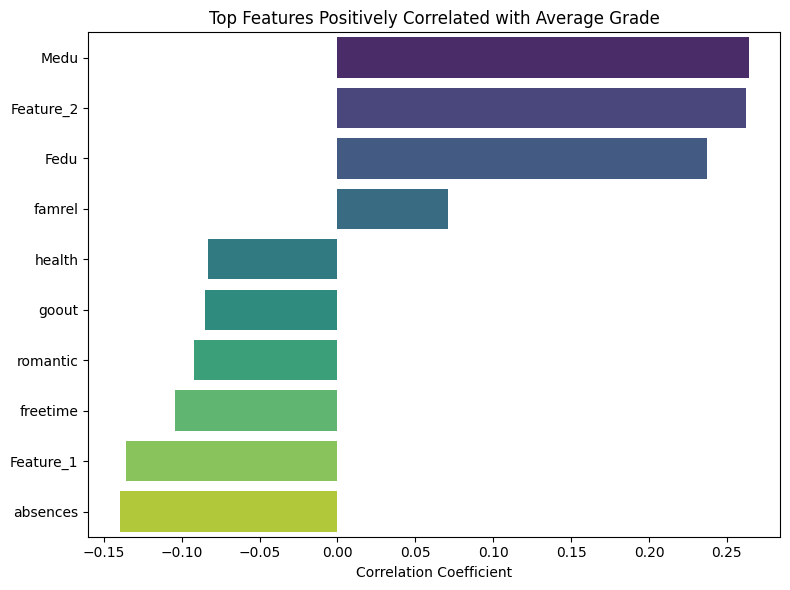

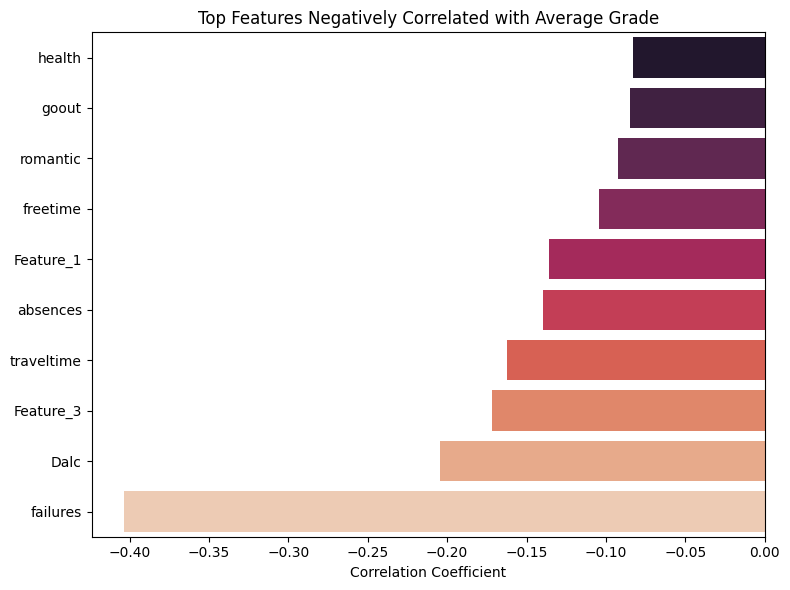

In [33]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Create an average grade column
df_encoded = df.copy()
df_encoded['romantic'] = df_encoded['romantic'].map({'yes': 1, 'no': 0})  # If not already encoded

# Create average grade column
df_encoded['avg_grade'] = df_encoded[['G1', 'G2', 'G3']].mean(axis=1)

# Step 2: Compute correlation matrix
corr = df_encoded.corr(numeric_only=True)

# Step 3: Get features most correlated with average grade
grade_corr = corr['avg_grade'].drop(['G1', 'G2', 'G3', 'avg_grade'])  # exclude G1, G2, G3
grade_corr_sorted = grade_corr.sort_values(ascending=False)

# Step 4: Plot top 10 positive and negative correlations
plt.figure(figsize=(8, 6))
sns.barplot(x=grade_corr_sorted[:10], y=grade_corr_sorted.index[:10], palette='viridis')
plt.title("Top Features Positively Correlated with Average Grade")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()

# Plot negatively correlated features
plt.figure(figsize=(8, 6))
sns.barplot(x=grade_corr_sorted[-10:], y=grade_corr_sorted.index[-10:], palette='rocket')
plt.title("Top Features Negatively Correlated with Average Grade")
plt.xlabel("Correlation Coefficient")
plt.tight_layout()
plt.show()



As we can see from the above correlation plot, father’s and mother’s education levels are highly related to the students’ grade

In [34]:
medu_grades = df.groupby('Medu')[['G1', 'G2', 'G3']].mean()
print("Mean grades by mother's education (Medu):")
print(medu_grades)

fedu_grades = df.groupby('Fedu')[['G1', 'G2', 'G3']].mean()
print("\nMean grades by father's education (Fedu):")
print(fedu_grades)

Mean grades by mother's education (Medu):
             G1         G2         G3
Medu                                 
0     10.833333  11.166667  11.666667
1     10.398601  10.465649  10.797203
2     11.204301  11.275862  11.661290
3     11.323741  11.609023  11.920863
4     12.502857  12.764706  13.068571

Mean grades by father's education (Fedu):
             G1         G2         G3
Fedu                                 
0.0   10.666667  10.666667  11.166667
1.0   10.522013  10.704698  10.930818
2.0   11.423077  11.491329  11.835165
3.0   11.714286  11.952381  12.312500
4.0   12.290598  12.636364  13.000000


/tmp/ipykernel_35/1331634217.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Medu', y='G3', ci=None)


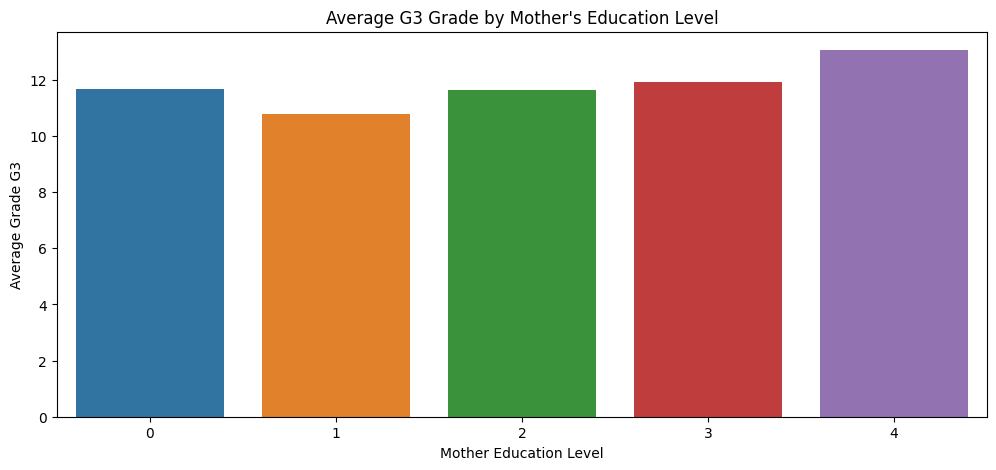

/tmp/ipykernel_35/1331634217.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='Fedu', y='G3', ci=None)


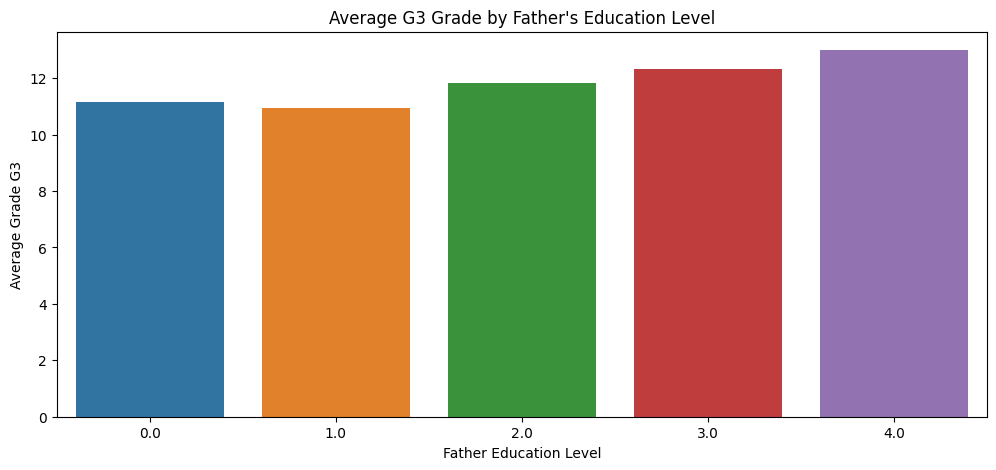

In [35]:
plt.figure(figsize=(12,5))
sns.barplot(data=df, x='Medu', y='G3', ci=None)
plt.title("Average G3 Grade by Mother's Education Level")
plt.xlabel('Mother Education Level')
plt.ylabel('Average Grade G3')
plt.show()

plt.figure(figsize=(12,5))
sns.barplot(data=df, x='Fedu', y='G3', ci=None)
plt.title("Average G3 Grade by Father's Education Level")
plt.xlabel('Father Education Level')
plt.ylabel('Average Grade G3')
plt.show()

Here, we can clearly see that as the education level of the mother and father increases, the student's grades are more likely to improve. The bar plot above clearly supports this observation


**Q2] Do students from urban and rural areas perform differently, and what kinds of facilities do they receive differently?**

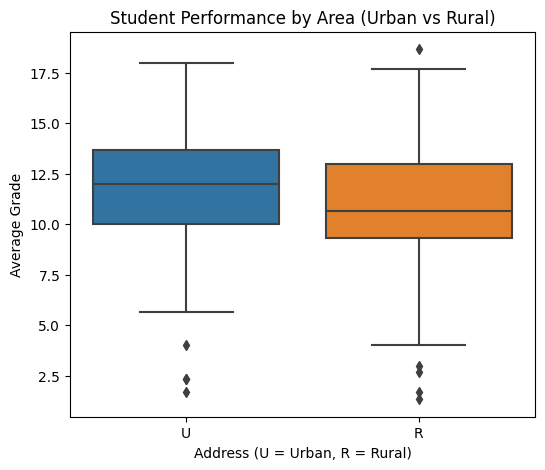

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create average grade
df['avg_grade'] = df[['G1', 'G2', 'G3']].mean(axis=1)

# 2. Compare average grade by address (Urban vs Rural)
plt.figure(figsize=(6, 5))
sns.boxplot(x='address', y='avg_grade', data=df)
plt.title('Student Performance by Area (Urban vs Rural)')
plt.xlabel('Address (U = Urban, R = Rural)')
plt.ylabel('Average Grade')
plt.show()


We can see from the boxplot that the average grades of students living in urban areas are higher than those in rural areas. Let's analyze this further to explore the possible reasons behind this difference.

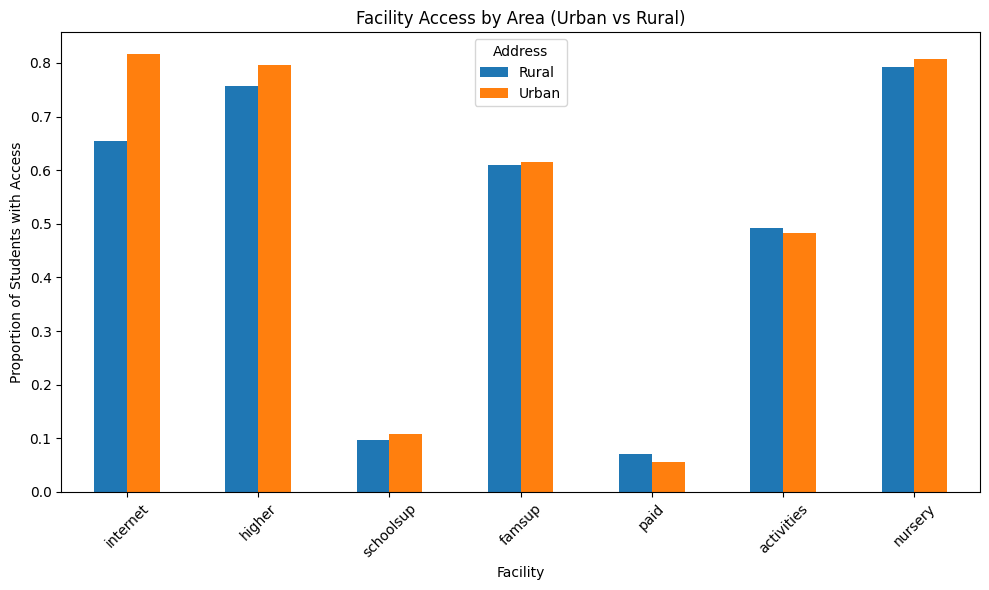

In [39]:
# List of facility-related features
facility_vars = ['internet', 'higher', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery']

# Calculate % of students with each facility by address
facility_data = df.groupby('address')[facility_vars].apply(lambda x: (x == 'yes').mean()).T

# Plot grouped bar chart
facility_data.plot(kind='bar', figsize=(10, 6))
plt.title('Facility Access by Area (Urban vs Rural)')
plt.ylabel('Proportion of Students with Access')
plt.xlabel('Facility')
plt.xticks(rotation=45)
plt.legend(title='Address', labels=['Rural', 'Urban'])
plt.tight_layout()
plt.show()


We can conclude that students from rural and urban areas receive almost the same educational facilities, such as family support famsup, school support schoolsup, access to nursery education, paid extra classes, aspirations for higher education, and participation in educational activities.

However, there is one crucial difference: **internet access**. Over 80% of urban students have access to the internet, compared to only 65% of rural students. This disparity in internet availability may be a key factor contributing to the better academic performance of students in urban areas.




**Q3]What is the gender distribution among students who are in romantic relationships?**

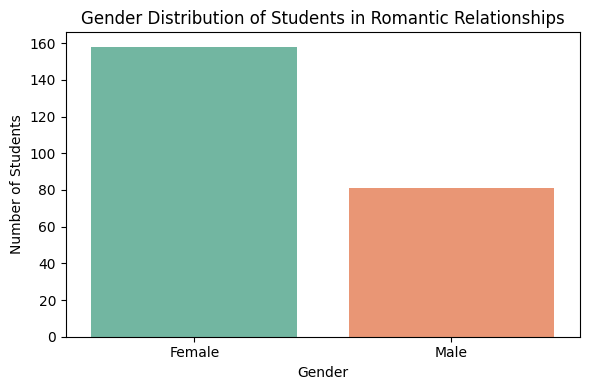

Percentage distribution among students in relationships:
sex
F    66.108787
M    33.891213
Name: proportion, dtype: float64


In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Countplot of gender among students in a romantic relationship
plt.figure(figsize=(6, 4))
sns.countplot(x='sex', data=df[df['romantic'] == 'yes'], palette='Set2')

plt.title('Gender Distribution of Students in Romantic Relationships')
plt.xlabel('Gender')
plt.ylabel('Number of Students')
plt.xticks(ticks=[0,1], labels=['Female', 'Male'])
plt.tight_layout()
plt.show()
romantic_gender_counts = df[df['romantic'] == 'yes']['sex'].value_counts(normalize=True) * 100
print("Percentage distribution among students in relationships:")
print(romantic_gender_counts)


We can clearly conclude that females are more likely to be in a romantic relationship compared to males.


**Q4]How do  grades differ between students who are in a romantic relationship and those who are not?**

In [43]:
df['avg_grade'] = (df['G1'] + df['G2'] + df['G3']) / 3


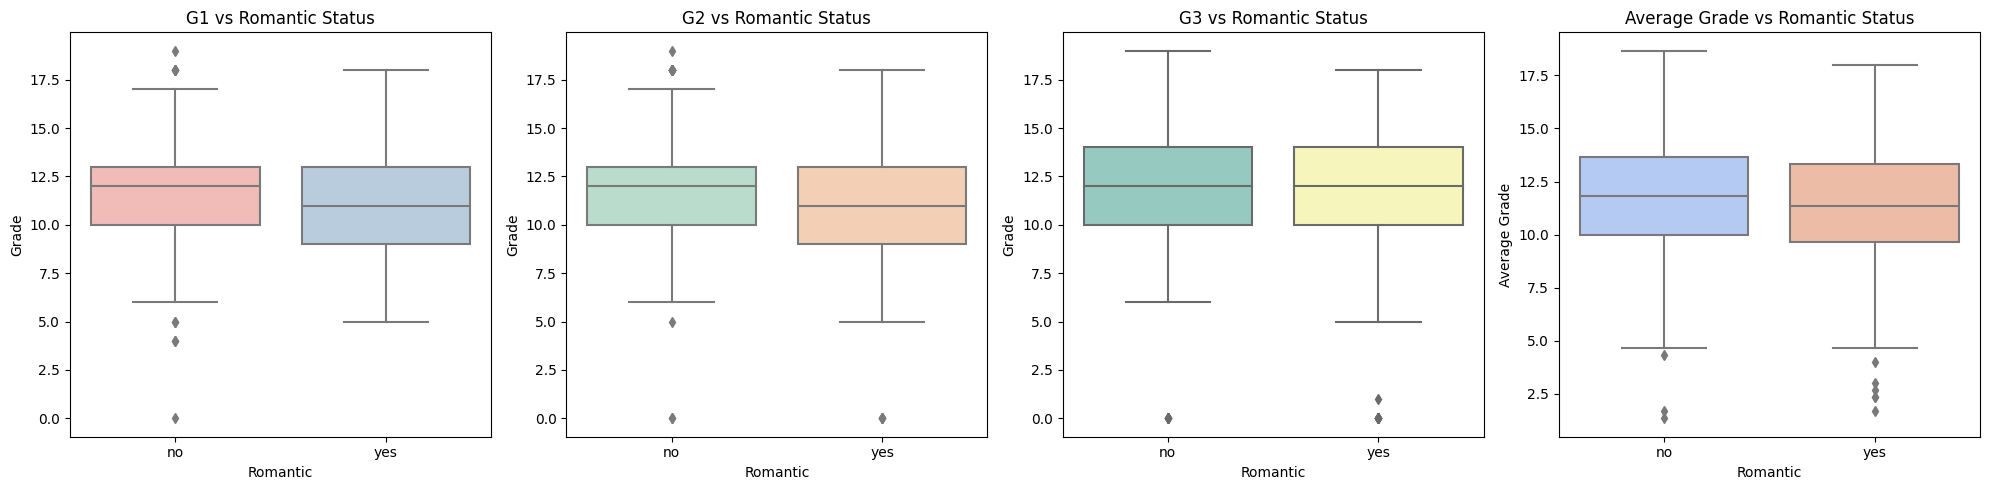

Mean Grades by Romantic Status:

                 G1         G2         G3  avg_grade
romantic                                            
no        11.556098  11.830729  12.129268  11.867188
yes       11.129707  11.178261  11.523013  11.269565


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up figure
fig, axs = plt.subplots(1, 4, figsize=(20, 5))

# G1
sns.boxplot(x='romantic', y='G1', data=df, ax=axs[0], palette='Pastel1')
axs[0].set_title('G1 vs Romantic Status')
axs[0].set_xlabel('Romantic')
axs[0].set_ylabel('Grade')

# G2
sns.boxplot(x='romantic', y='G2', data=df, ax=axs[1], palette='Pastel2')
axs[1].set_title('G2 vs Romantic Status')
axs[1].set_xlabel('Romantic')
axs[1].set_ylabel('Grade')

# G3
sns.boxplot(x='romantic', y='G3', data=df, ax=axs[2], palette='Set3')
axs[2].set_title('G3 vs Romantic Status')
axs[2].set_xlabel('Romantic')
axs[2].set_ylabel('Grade')

# avg_grade
sns.boxplot(x='romantic', y='avg_grade', data=df, ax=axs[3], palette='coolwarm')
axs[3].set_title('Average Grade vs Romantic Status')
axs[3].set_xlabel('Romantic')
axs[3].set_ylabel('Average Grade')

plt.tight_layout()
plt.show()
mean_grades = df.groupby('romantic')[['G1', 'G2', 'G3', 'avg_grade']].mean()
print("Mean Grades by Romantic Status:\n")
print(mean_grades)


In [45]:
failures_by_romantic = df.groupby('romantic')['failures'].mean()
print("Average Number of Past Failures by Romantic Status:\n")
print(failures_by_romantic)


Average Number of Past Failures by Romantic Status:

romantic
no     0.190244
yes    0.276151
Name: failures, dtype: float64


As we can see, students who are not in a relationship tend to have slightly higher grades compared to those who are.

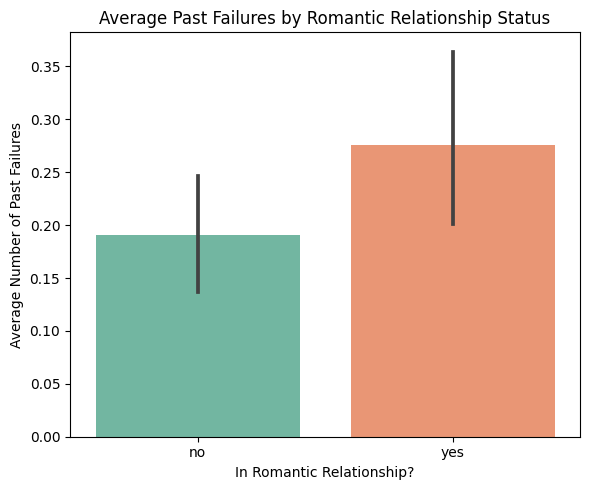

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.barplot(x='romantic', y='failures', data=df, palette='Set2')
plt.title('Average Past Failures by Romantic Relationship Status')
plt.xlabel('In Romantic Relationship?')
plt.ylabel('Average Number of Past Failures')
plt.tight_layout()
plt.show()


As we can see, students who are not in a relationship have a lower failure rate compared to those who are.

We can conclude from the above boxplot that students who are not in a relationship are more likely to perform better academically than those who are


Q5]Do students in a romantic relationship have different alcohol consumption patterns

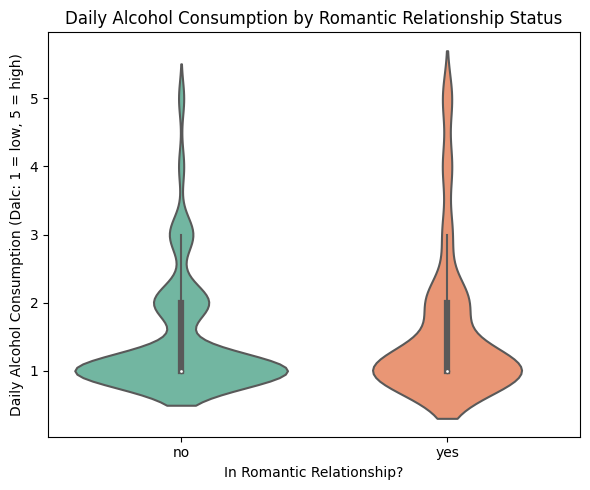

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 5))
sns.violinplot(x='romantic', y='Dalc', data=df, palette='Set2')
plt.title('Daily Alcohol Consumption by Romantic Relationship Status')
plt.xlabel('In Romantic Relationship?')
plt.ylabel('Daily Alcohol Consumption (Dalc: 1 = low, 5 = high)')
plt.tight_layout()
plt.show()


In [48]:
avg_dalc = df.groupby('romantic')['Dalc'].mean().round(2)
print("Average Daily Alcohol Consumption:\n")
print(avg_dalc)


Average Daily Alcohol Consumption:

romantic
no     1.46
yes    1.58
Name: Dalc, dtype: float64


While the difference in daily alcohol consumption between students in and out of romantic relationships is small (1.58 vs. 1.46), it suggests a slight tendency for romantically involved students to drink more regularly.

**Level 4 predication model**

We used other methods like Random Forest and Naive Bayes, but the best results and highest accuracy were achieved with logistic Regression combined with Grid Search CV. Although Naive Bayes showed high accuracy, it cannot be used due to the shape of the data, which is important for the next stages of the task

🔼 Top 10 positively correlated features with being in a romantic relationship:

Feature_1           0.177722
guardian_other      0.130019
absences            0.088932
school_MS           0.072241
failures            0.069901
Dalc                0.062042
activities_yes      0.057517
absences_bin_11+    0.050542
Feature_2           0.048487
Mjob_other          0.039095
Name: romantic, dtype: float64

🔽 Top 10 negatively correlated features:

Pstatus_T           -0.053828
Fedu                -0.057064
Mjob_services       -0.063447
reason_reputation   -0.066754
G1                  -0.074973
G3                  -0.090583
schoolsup_yes       -0.094310
higher_yes          -0.101056
G2                  -0.102694
sex_M               -0.110144
Name: romantic, dtype: float64


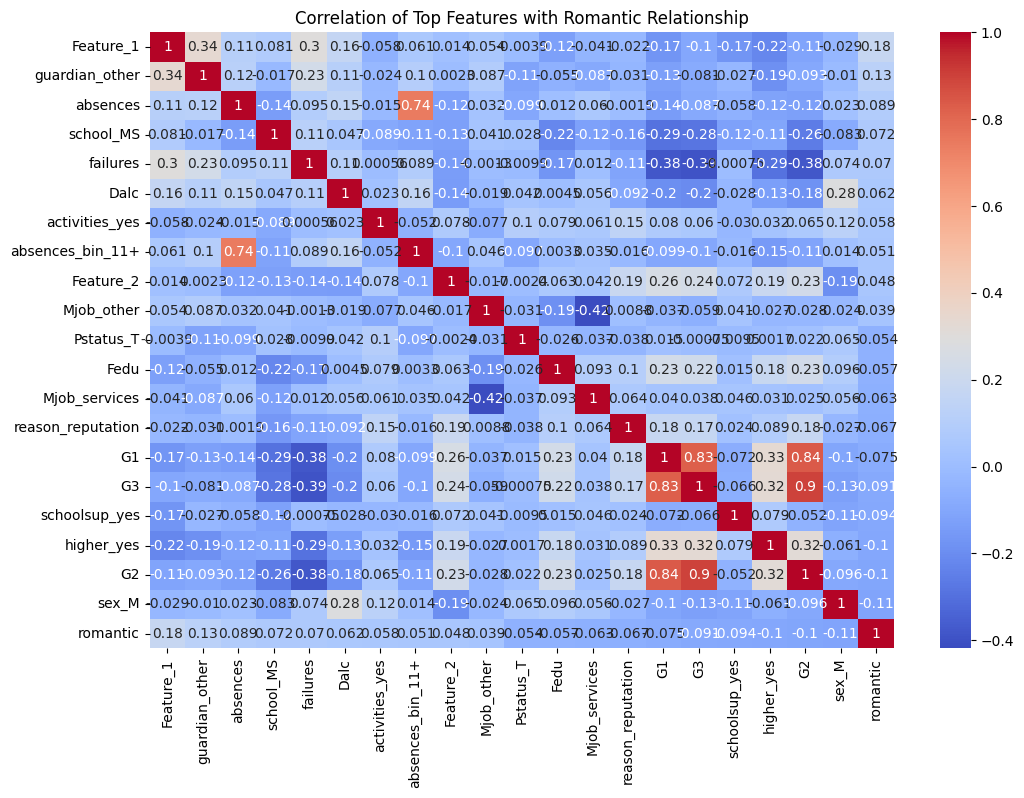

In [149]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Step 1: Encode target column 'romantic'
if df['romantic'].dtype == 'object':
    df['romantic'] = df['romantic'].map({'yes': 1, 'no': 0})

# Step 2: One-hot encode other categorical features
df_encoded = pd.get_dummies(df, drop_first=True)

# ✅ Step 2.5: Standard scale numeric columns before correlation
numeric_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns.drop('romantic')
scaler = StandardScaler()
df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

# Step 3: Correlation analysis
correlation_matrix = df_encoded.corr()
correlation_with_target = correlation_matrix['romantic'].sort_values(ascending=False)

threshold = 0.06
relevant_features = correlation_with_target[abs(correlation_with_target) > threshold].index.tolist()
if 'romantic' in relevant_features:
    relevant_features.remove('romantic')

df_reduced = df_encoded[relevant_features + ['romantic']]

top_positive = correlation_with_target[1:11]
top_negative = correlation_with_target[-10:]

print("🔼 Top 10 positively correlated features with being in a romantic relationship:\n")
print(top_positive)
print("\n🔽 Top 10 negatively correlated features:\n")
print(top_negative)

top_features = list(top_positive.index) + list(top_negative.index)
plt.figure(figsize=(1, 8))
sns.heatmap(df_encoded[top_features + ['romantic']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation of Top Features with Romantic Relationship")
plt.show()

# Step 5: Prepare features and target
X = df_reduced.drop('romantic', axis=1)
y = df_reduced['romantic']



**LEVEL 5**

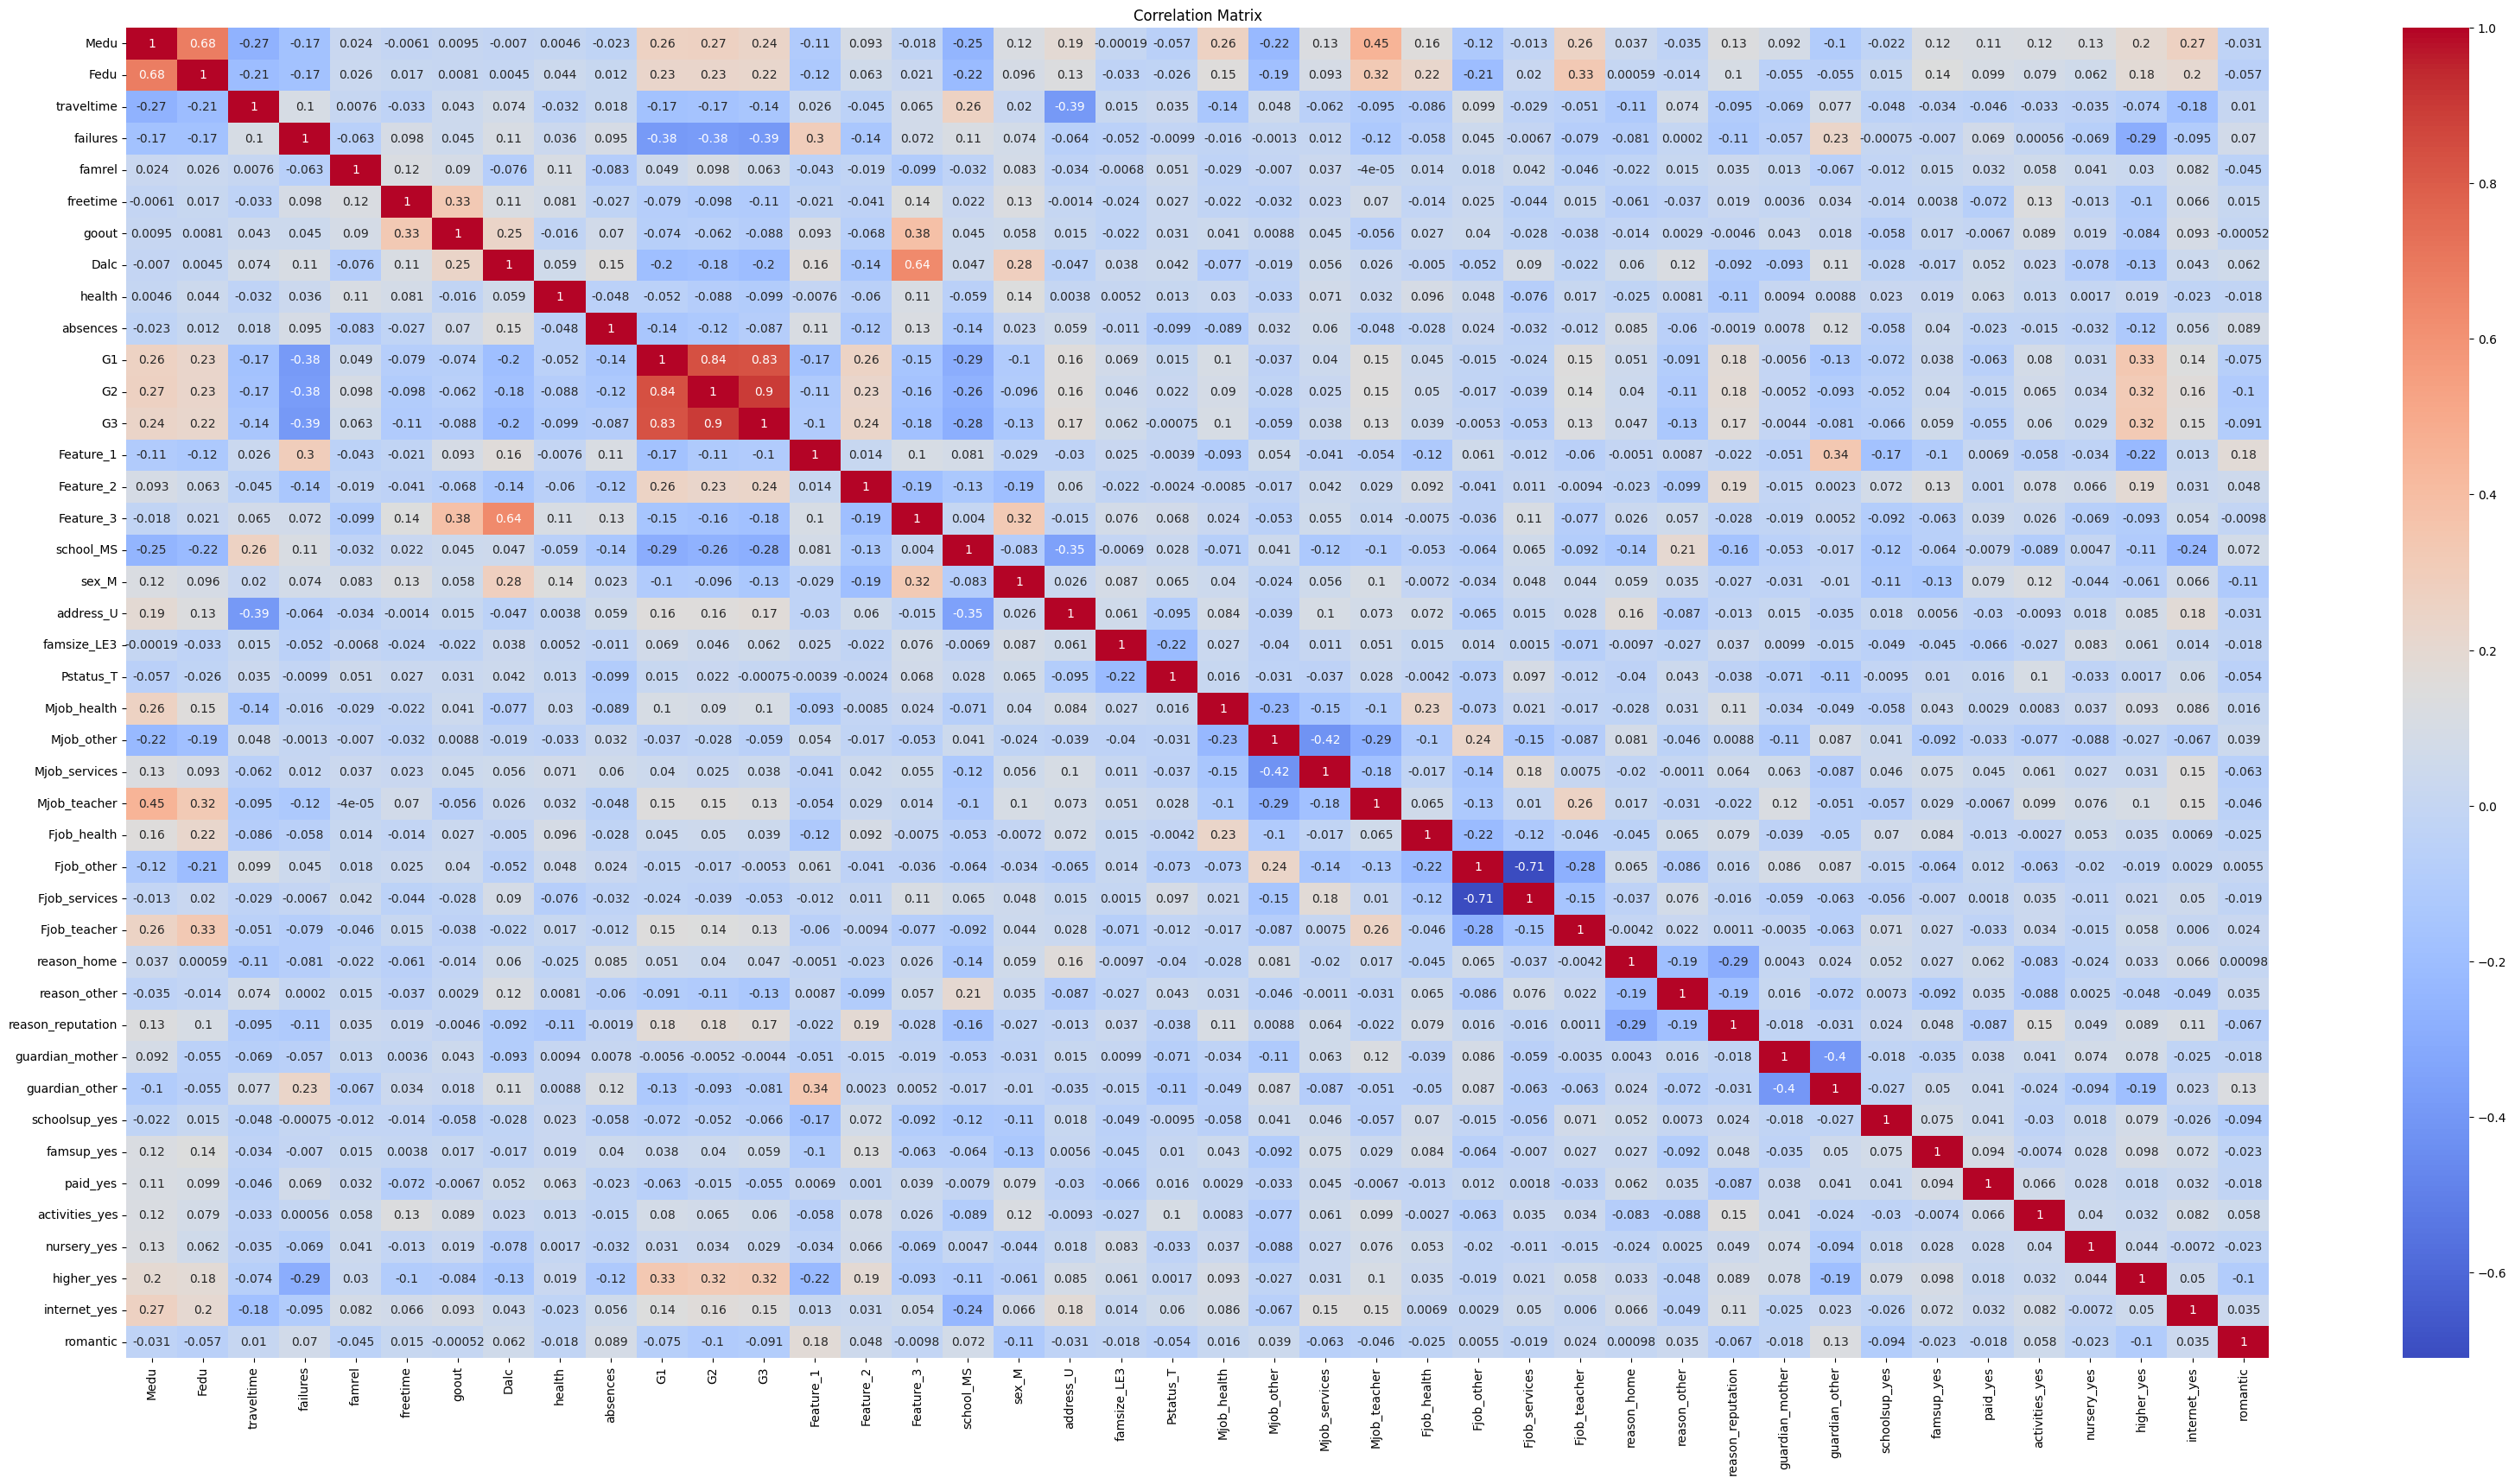

In [140]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y is already numeric (0/1)
df_copy = X.copy()
df_copy['romantic'] = y
plt.figure(figsize=(40, 20))
sns.heatmap(df_copy.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

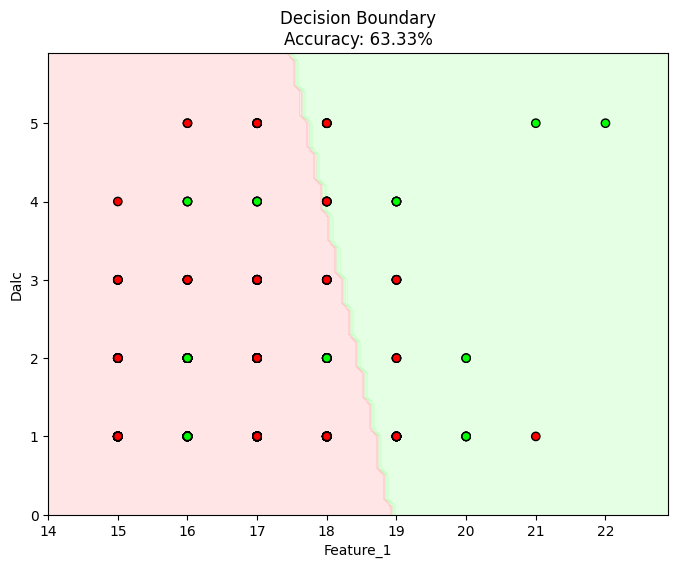

NameError: name 'RandomForestClassifier' is not defined

In [142]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.metrics import accuracy_score

def plot_decision_boundary(model, X, y, features):
    X_selected = X[features].values


    model.fit(X_selected, y)

    y_pred = model.predict(X_selected)
    accuracy = accuracy_score(y, y_pred)


    x_min, x_max = X_selected[:, 0].min() - 1, X_selected[:, 0].max() + 1
    y_min, y_max = X_selected[:, 1].min() - 1, X_selected[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                         np.arange(y_min, y_max, 0.1))


    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)


    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_light)


    plt.scatter(X_selected[:, 0], X_selected[:, 1], c=y, cmap=cmap_bold, edgecolor='k')

    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.title(f"Decision Boundary\nAccuracy: {accuracy * 100:.2f}%")
    plt.show()

from sklearn.linear_model import LogisticRegression

features = ['Feature_1', 'Dalc']
plot_decision_boundary(LogisticRegression(), X, y, features)
plot_decision_boundary(RandomForestClassifier(), X, y, features)
#First plot is of Logistic Regression and the second one is for RandomForest Classifier.

In [143]:
!pip install shap

In [148]:
import shap
For LogisticRegression or other linear models, use KernelExplainer or LinearExplainer
    print("LogisticRegression")
    explainer = shap.LinearExplainer(classifier, X_train_scaled_df, feature_perturbation="interventional")



# Calculate SHAP values on a sample or the whole training set
shap_values = explainer.shap_values(X_train_scaled_df)

# Plot summary
shap.summary_plot(shap_values, X_train_scaled_df)


SyntaxError: invalid syntax (2904147147.py, line 2)

In [147]:
import shap



# Extract the scaler and the classifier
scaler = best_model.named_steps['scaler']
classifier = best_model.named_steps['model']

# Transform the training data using the scaler in the pipeline
X_train_scaled = scaler.transform(X_train)  # X_train must have the same columns as used in training

# Convert scaled data back to DataFrame for SHAP, columns are same as original X_train columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Create SHAP explainer on the scaled data
# For tree-based models like RandomForest:
if best_algo == 'Random Forest':
    print("RANDOM FOREST")
    explainer = shap.TreeExplainer(classifier)
else:
    # For LogisticRegression or other linear models, use KernelExplainer or LinearExplainer
    print("LogisticRegression")
    explainer = shap.LinearExplainer(classifier, X_train_scaled_df, feature_perturbation="interventional")



# Calculate SHAP values on a sample or the whole training set
shap_values = explainer.shap_values(X_train_scaled_df)

# Plot summary
shap.summary_plot(shap_values, X_train_scaled_df)

NameError: name 'results' is not defined

In [144]:
import shap

# Use the best model pipeline from GridSearchCV
best_model = results[best_algo]['best_model']

# Extract the scaler and the classifier
scaler = best_model.named_steps['scaler']
classifier = best_model.named_steps['model']

# Transform the training data using the scaler in the pipeline
X_train_scaled = scaler.transform(X_train)  # X_train must have the same columns as used in training

# Convert scaled data back to DataFrame for SHAP, columns are same as original X_train columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Create SHAP explainer on the scaled data
# For tree-based models like RandomForest:
if best_algo == 'Random Forest':
    print("RANDOM FOREST")
    explainer = shap.TreeExplainer(classifier)
else:
    # For LogisticRegression or other linear models, use KernelExplainer or LinearExplainer
    print("LogisticRegression")
    explainer = shap.LinearExplainer(classifier, X_train_scaled_df, feature_perturbation="interventional")



# Calculate SHAP values on a sample or the whole training set
shap_values = explainer.shap_values(X_train_scaled_df)

# Plot summary
shap.summary_plot(shap_values, X_train_scaled_df)

NameError: name 'results' is not defined

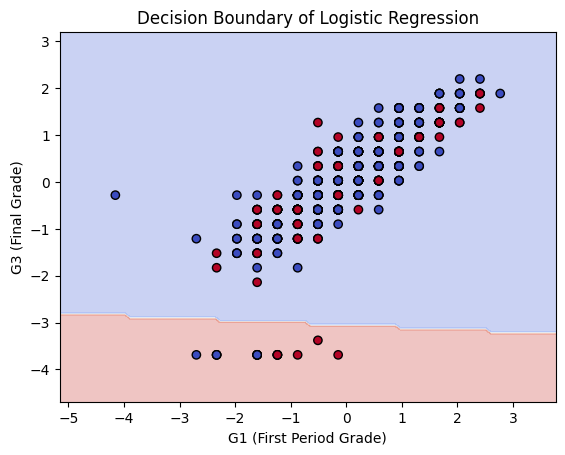

In [51]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Choose two meaningful features
features = ['G1', 'G3']  # example: first and final grades



In [52]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


=== SHAP for student predicted YES ===


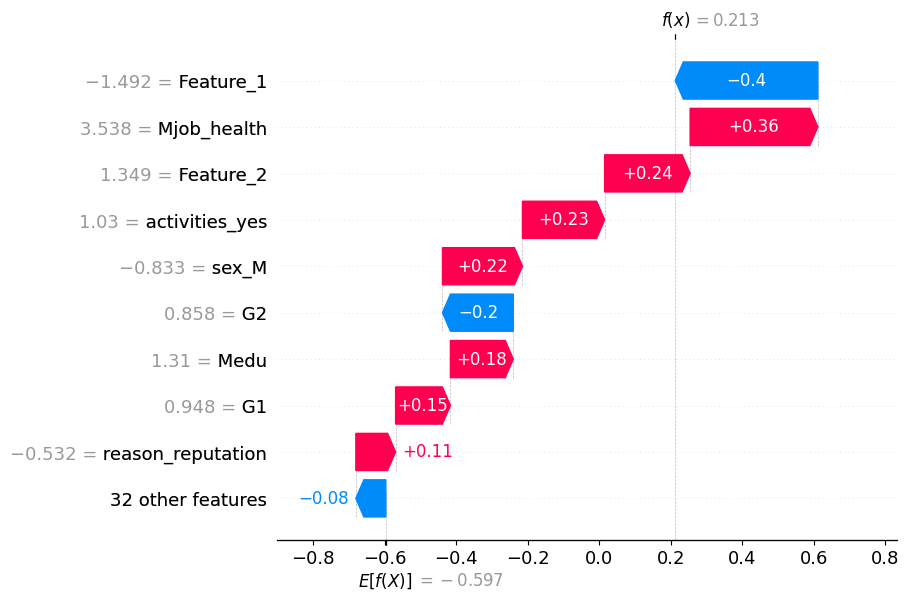

=== SHAP for student predicted NO ===


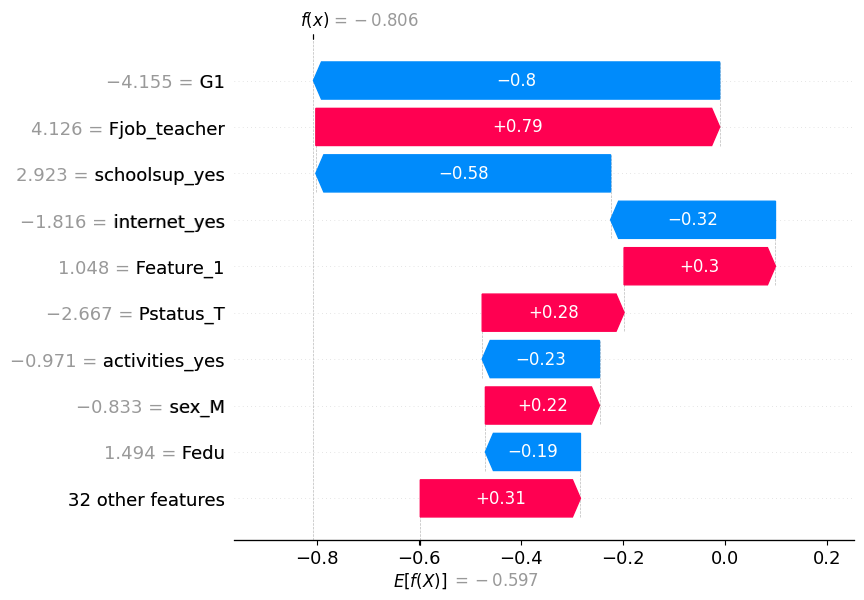

In [54]:
# Pick one example predicted "Yes" and one "No"
preds = logreg.predict(X_scaled_full)
yes_index = np.where(preds == 1)[0][0]
no_index = np.where(preds == 0)[0][0]

# Explain both
print("=== SHAP for student predicted YES ===")
shap.plots.waterfall(shap_values[yes_index])

print("=== SHAP for student predicted NO ===")
shap.plots.waterfall(shap_values[no_index])


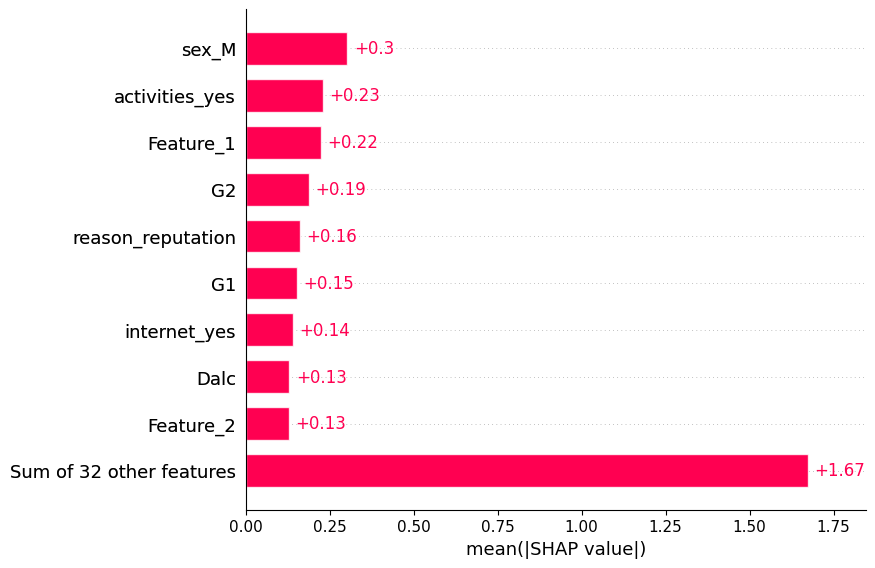

In [53]:
import shap

# Prepare data
X_full = df.drop('romantic', axis=1)
y_full = df['romantic']

# Train model with full features
scaler = StandardScaler()
X_scaled_full = scaler.fit_transform(X_full)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_scaled_full, y_full)

# SHAP explanation
explainer = shap.Explainer(logreg, X_scaled_full, feature_names=X_full.columns)
shap_values = explainer(X_scaled_full)

# Global importance
shap.plots.bar(shap_values)


In [22]:
df_plot = df.copy()
df_plot['avg_grade'] = df_plot[['G1', 'G2', 'G3']].mean(axis=1)


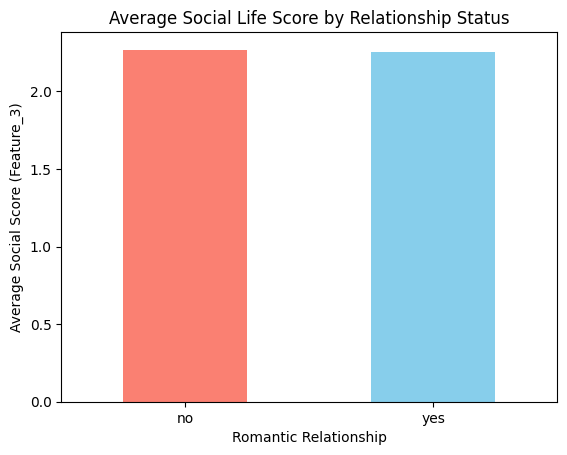

In [9]:
df.groupby('romantic')['Feature_3'].mean().plot(kind='bar', color=['salmon', 'skyblue'])
plt.title('Average Social Life Score by Relationship Status')
plt.xlabel('Romantic Relationship')
plt.ylabel('Average Social Score (Feature_3)')
plt.xticks(rotation=0)
plt.show()


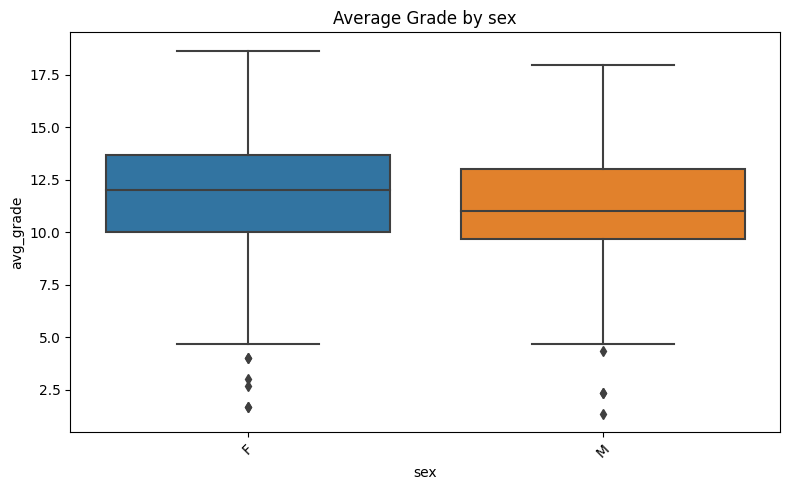

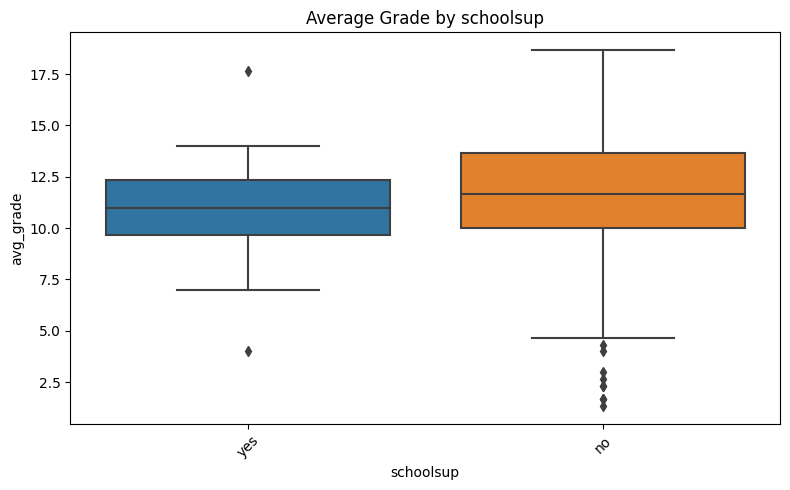

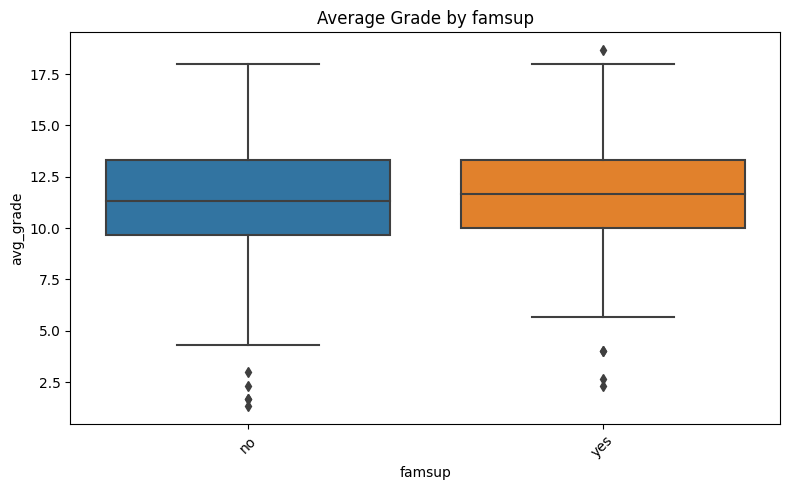

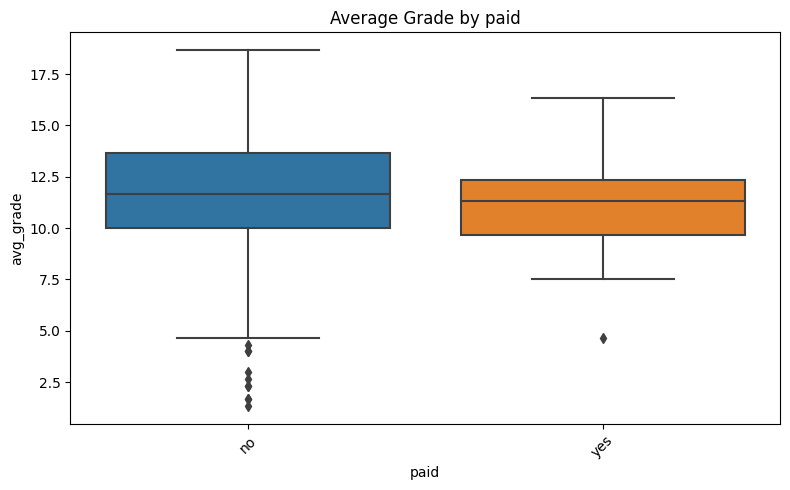

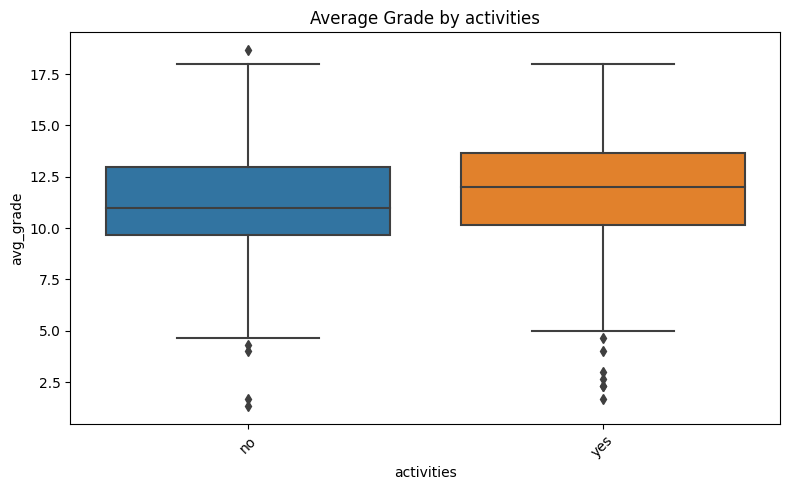

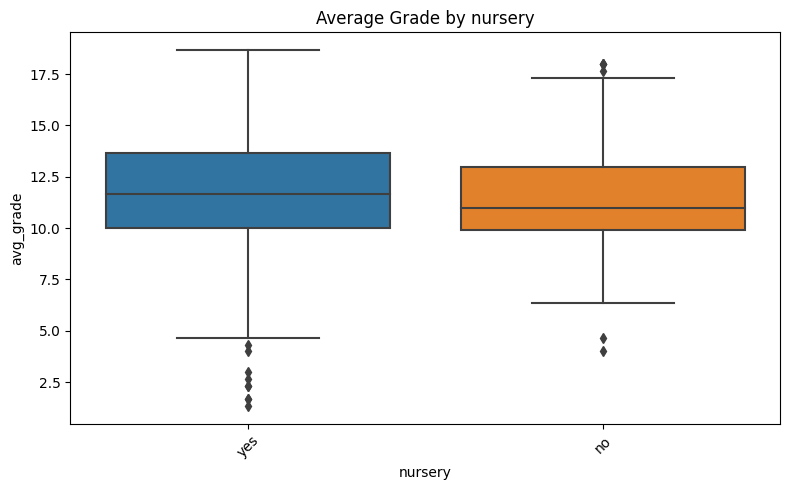

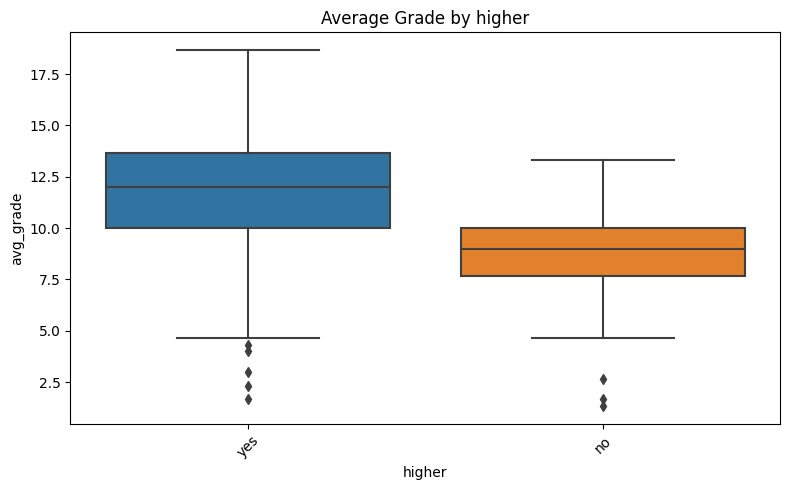

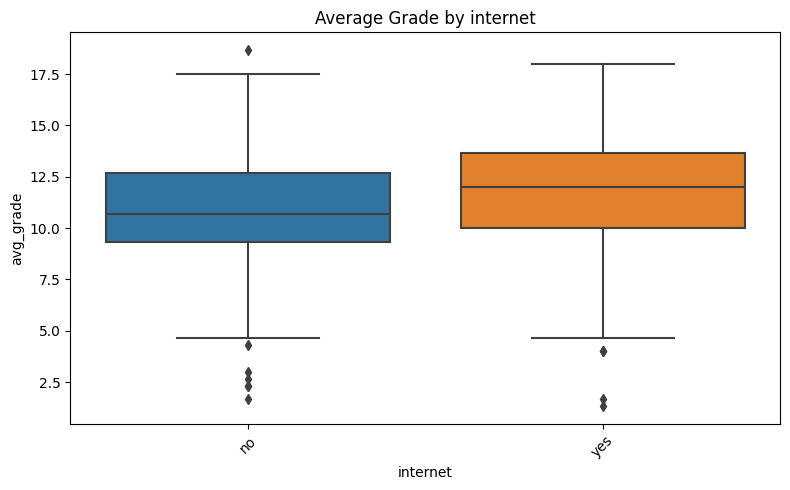

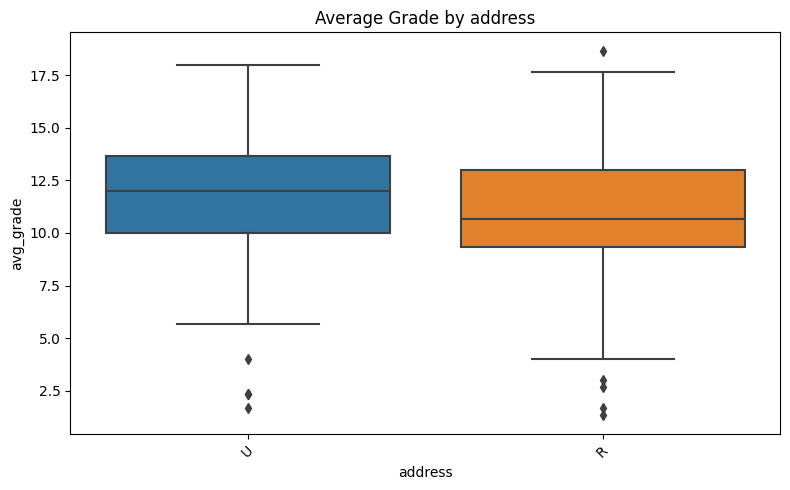

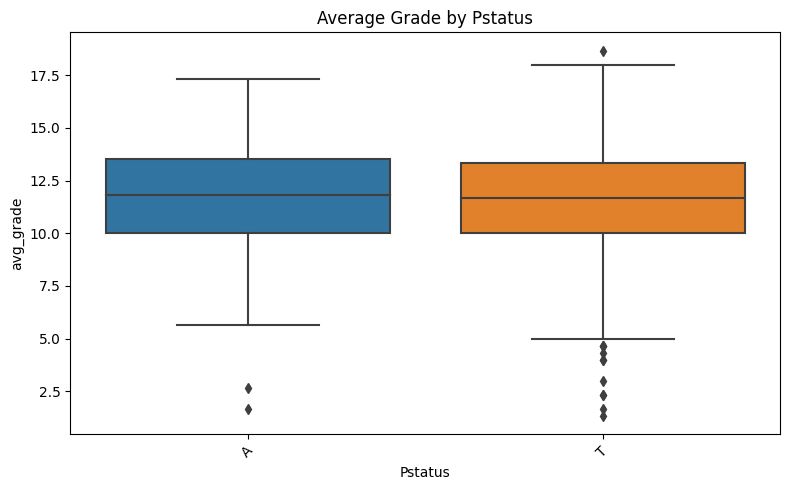

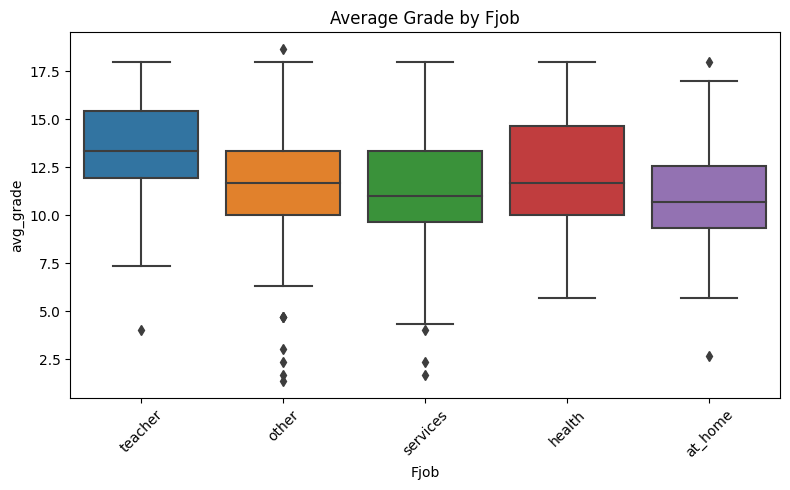

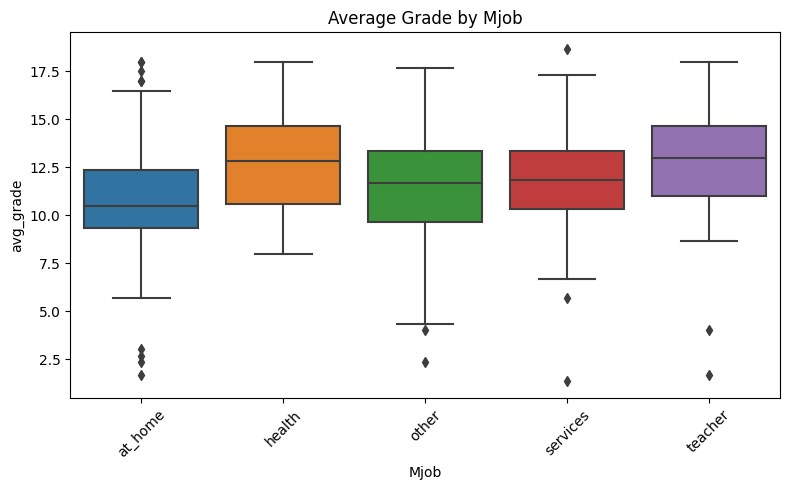

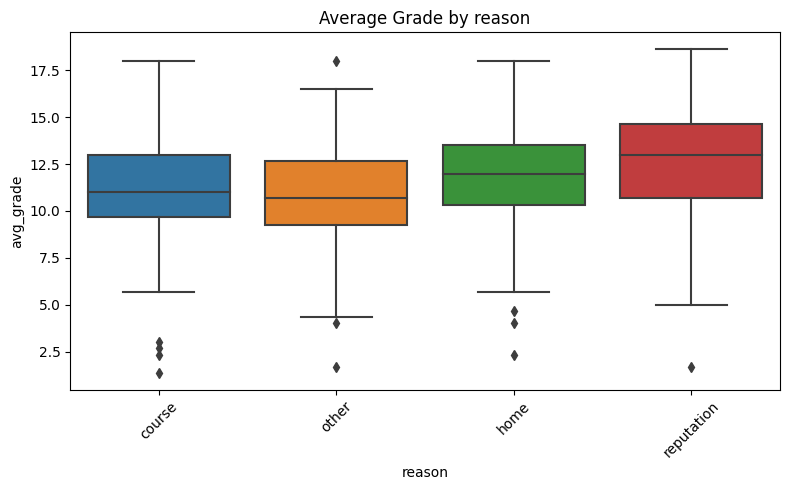

In [30]:
#categorical values vs grades
categorical_vars = ['sex', 'schoolsup', 'famsup', 'paid', 'activities',
                    'nursery', 'higher', 'internet', 'address', 'Pstatus',
                    'Fjob', 'Mjob', 'reason']

for var in categorical_vars:
    plt.figure(figsize=(8, 5))
    sns.boxplot(x=var, y='avg_grade', data=df_plot)
    plt.title(f'Average Grade by {var}')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
